# Sarnia Weather Data Analysis

## Table of Contents

1. [Data Source and Collection](#1)
   

2. [Weather Data DataFrame Information](#2)
   

3. [Data Cleaning and Preprocessing](#3)
   

4. [Missing Data Analysis in Weather Dataset](#4)
   

5. [Handling the Missing Values](#5)
   
6. [Exploratory Data Analysis](#6)

# Data Source and Collection <a id="1"></a>

Historical weather data for Sarnia was obtained from the official Canadian climate data portal:
[https://dd.weather.gc.ca/climate/](https://dd.weather.gc.ca/climate/)

At this source, data is made available on a year-by-year basis. Consequently, individual files for each year were downloaded to compile a comprehensive dataset.

## Available Weather Stations

Four distinct weather stations in Sarnia were identified, each covering different time periods. The distribution of these stations is as follows:

| Station name | Climate ID | Province / Territory | Latitude | Longitude | First date | Last date |
|--------------|------------|----------------------|----------|-----------|------------|-----------|
| SARNIA | 6127510 | ON | 42.9994 | -82.3089 | 2009-12-10 | 2024-10-14 |
| SARNIA AIRPORT | 6127514 | ON | 42.9922 | -82.3047 | 1967-12-01 | 2005-08-31 |
| SARNIA CHRIS HADFIELD A | 6127518 | ON | 42.9994 | -82.3089 | 2005-03-08 | 2010-03-02 |
| SARNIA CLIMATE | 6127519 | ON | 43.0000 | -82.3000 | 2005-12-07 | 2024-10-14 |

## Data Merging Strategy

Due to the incomplete coverage of individual stations for the entire period of interest (1967-present), a data merging strategy was devised. The following challenges were addressed:

1. No single station covers the complete range from 1967 to the present.
2. Data slightly differs between stations on overlapping dates.
3. Each year's data is contained in separate files, necessitating a joining process for the exploratory data analysis (EDA).

Two main approaches were considered:

1. Utilization of all 4 stations:
   - Pros: More comprehensive data coverage
   - Cons: Increased complexity in merging and analysis, potential date duplications

2. Utilization of 2 primary stations for simplified analysis:
   - SARNIA AIRPORT (1967-2005)
   - SARNIA CLIMATE (2005-present)
   - Pros: Near-complete coverage, easier data management
   - Cons: Small gap in 2005, potential loss of nuances from other stations

## Final Data Compilation

After careful consideration, a hybrid approach was implemented:

1. Data from two primary stations was merged:
   - SARNIA AIRPORT (1967-2005)
   - SARNIA CLIMATE (2005-present)

2. To bridge the gap between these two datasets, a three-month period was supplemented with data from SARNIA CHRIS HADFIELD A.

This approach resulted in a comprehensive dataset covering the period from 1967 to 2024, ensuring continuous data coverage while maintaining manageable complexity for analysis.

The merged dataset now serves as the foundation for subsequent exploratory data analysis and weather pattern investigations in Sarnia over the past five decades.

In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os


In [2]:
# Load the merged weather dataset into a pandas DataFrame
df = pd.read_csv('merged_dataset.csv', low_memory=False)
df.head()

Longitude (x)  Latitude (y)    Station Name  Climate ID  \
0          -82.3         42.99  SARNIA AIRPORT     6127514   
1          -82.3         42.99  SARNIA AIRPORT     6127514   
2          -82.3         42.99  SARNIA AIRPORT     6127514   
3          -82.3         42.99  SARNIA AIRPORT     6127514   
4          -82.3         42.99  SARNIA AIRPORT     6127514   

       Date/Time (LST)  Year  Month  Day Time (LST)  Temp (°C)  ...  \
0  1967-12-01 08:00:00  1967     12    1      08:00       -7.2  ...   
1  1967-12-01 09:00:00  1967     12    1      09:00       -5.0  ...   
2  1967-12-01 10:00:00  1967     12    1      10:00       -2.8  ...   
3  1967-12-01 11:00:00  1967     12    1      11:00       -1.1  ...   
4  1967-12-01 12:00:00  1967     12    1      12:00        0.6  ...   

  Visibility Flag  Stn Press (kPa) Stn Press Flag  Hmdx Hmdx Flag  Wind Chill  \
0             NaN           100.74            NaN   NaN       NaN       -12.0   
1             NaN           100.78            NaN   NaN       NaN       -10.0   
2             NaN           100.78            NaN   NaN       NaN        -8.0   
3             NaN           100.79            NaN   NaN       NaN        -6.0   
4             NaN           100.69            NaN   NaN       NaN         NaN   

  Wind Chill Flag        Weather Precip. Amount (mm)  Precip. Amount Flag  
0             NaN   Mainly Clear                 NaN                  NaN  
1             NaN   Mainly Clear                 NaN                  NaN  
2             NaN  Mostly Cloudy                 NaN                  NaN  
3             NaN   Mainly Clear                 NaN                  NaN  
4             NaN   Mainly Clear                 NaN                  NaN  

[5 rows x 30 columns]

In [3]:
# dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498472 entries, 0 to 498471
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Longitude (x)        498472 non-null  float64
 1   Latitude (y)         498472 non-null  float64
 2   Station Name         498472 non-null  object 
 3   Climate ID           498472 non-null  int64  
 4   Date/Time (LST)      498472 non-null  object 
 5   Year                 498472 non-null  int64  
 6   Month                498472 non-null  int64  
 7   Day                  498472 non-null  int64  
 8   Time (LST)           498472 non-null  object 
 9   Temp (°C)            314055 non-null  float64
 10  Temp Flag            53324 non-null   object 
 11  Dew Point Temp (°C)  313204 non-null  float64
 12  Dew Point Temp Flag  54155 non-null   object 
 13  Rel Hum (%)          313208 non-null  float64
 14  Rel Hum Flag         54154 non-null   object 
 15  Wind Dir (10s deg

# Weather Data DataFrame Information <a id="2"></a>

### Overview
- **Total Entries**: 498,472 (0 to 498,471)
- **Total Columns**: 30


### Data Types Summary
- datetime64[ns]: 1 column
- float64: 13 columns
- int64: 4 columns
- object: 12 columns


### Weather Data Column Explanations

1. **Longitude (x)**: The east-west geographic coordinate of the weather station.

2. **Latitude (y)**: The north-south geographic coordinate of the weather station.

3. **Station Name**: The name or identifier of the weather station.

4. **Climate ID**: A unique identifier for the climate station.

5. **Date/Time (LST)**: The date and time of the observation in Local Standard Time.

6. **Year**: The year of the observation.

7. **Month**: The month of the observation.

8. **Day**: The day of the observation.

9. **Time (LST)**: The time of the observation in Local Standard Time.

10. **Temp (°C)**: The air temperature in degrees Celsius.

11. **Temp Flag**: A quality control flag for the temperature reading.

12. **Dew Point Temp (°C)**: The dew point temperature in degrees Celsius. This is the temperature at which water vapor condenses.

13. **Dew Point Temp Flag**: A quality control flag for the dew point temperature reading.

14. **Rel Hum (%)**: Relative humidity, expressed as a percentage.

15. **Rel Hum Flag**: A quality control flag for the relative humidity reading.

16. **Wind Dir (10s deg)**: Wind direction in tens of degrees. For example, 9 would represent 90 degrees (east).

17. **Wind Dir Flag**: A quality control flag for the wind direction reading.

18. **Wind Spd (km/h)**: Wind speed in kilometers per hour.

19. **Wind Spd Flag**: A quality control flag for the wind speed reading.

20. **Visibility (km)**: The visibility distance in kilometers.

21. **Visibility Flag**: A quality control flag for the visibility reading.

22. **Stn Press (kPa)**: The station pressure in kilopascals.

23. **Stn Press Flag**: A quality control flag for the station pressure reading.

24. **Hmdx**: The humidex, a measure of how hot it feels when relative humidity is combined with air temperature.

25. **Hmdx Flag**: A quality control flag for the humidex reading.

26. **Wind Chill**: The wind chill index, representing how cold it feels based on air temperature and wind speed.

27. **Wind Chill Flag**: A quality control flag for the wind chill reading.

28. **Weather**: A description of the observed weather conditions.

29. **Precip. Amount (mm)**: The amount of precipitation in millimeters.

30. **Precip. Amount Flag**: A quality control flag for the precipitation amount reading.

Note on Flag columns: These typically indicate the quality or reliability of the corresponding measurement. Common flag values might include:
- Blank: No issues, data passed quality control
- M: Missing data
- E: Estimated value
- Other letters or numbers might indicate specific quality control issues or adjustments

In [4]:
# Count the number of missing values
df.isnull().sum()

Longitude (x)               0
Latitude (y)                0
Station Name                0
Climate ID                  0
Date/Time (LST)             0
Year                        0
Month                       0
Day                         0
Time (LST)                  0
Temp (°C)              184417
Temp Flag              445148
Dew Point Temp (°C)    185268
Dew Point Temp Flag    444317
Rel Hum (%)            185264
Rel Hum Flag           444318
Wind Dir (10s deg)      58741
Wind Dir Flag          497113
Wind Spd (km/h)         38482
Wind Spd Flag          497070
Visibility (km)        349024
Visibility Flag        445218
Stn Press (kPa)        185513
Stn Press Flag         444049
Hmdx                   447091
Hmdx Flag              498472
Wind Chill             429157
Wind Chill Flag        498448
Weather                351083
Precip. Amount (mm)    404503
Precip. Amount Flag    497772
dtype: int64

In [5]:
# descriptive statistics
df.describe()


Longitude (x)   Latitude (y)    Climate ID           Year  \
count  498472.000000  498472.000000  4.984720e+05  498472.000000   
mean      -82.300047      42.993363  6.127516e+06    1995.858415   
std         0.000683       0.004724  2.356623e+00      16.417047   
min       -82.310000      42.990000  6.127514e+06    1967.000000   
25%       -82.300000      42.990000  6.127514e+06    1982.000000   
50%       -82.300000      42.990000  6.127514e+06    1996.000000   
75%       -82.300000      43.000000  6.127519e+06    2010.000000   
max       -82.300000      43.000000  6.127519e+06    2024.000000   

               Month            Day      Temp (°C)  Dew Point Temp (°C)  \
count  498472.000000  498472.000000  314055.000000        313204.000000   
mean        6.513537      15.724695       9.083461             4.365268   
std         3.446454       8.798660      10.773952            10.070888   
min         1.000000       1.000000     -28.900000           -32.100000   
25%         4.000000       8.000000       0.600000            -3.000000   
50%         7.000000      16.000000       9.000000             4.400000   
75%        10.000000      23.000000      18.100000            12.900000   
max        12.000000      31.000000      38.400000            27.400000   

         Rel Hum (%)  Wind Dir (10s deg)  Wind Spd (km/h)  Visibility (km)  \
count  313208.000000       439731.000000    459990.000000    149448.000000   
mean       74.388030           19.734306        15.278619        17.390690   
std        15.918792            9.955577         9.178283         8.185453   
min        11.000000            0.000000         0.000000         0.000000   
25%        64.000000           14.000000         9.000000         9.700000   
50%        76.000000           20.000000        14.000000        19.300000   
75%        87.000000           27.000000        20.000000        24.100000   
max       100.000000           36.000000        93.000000        40.200000   

       Stn Press (kPa)          Hmdx  Hmdx Flag    Wind Chill  \
count    312959.000000  51381.000000        0.0  69315.000000   
mean         99.446811     30.172496        NaN    -10.940287   
std           0.750225      3.883933        NaN      5.702035   
min          93.440000     25.000000        NaN    -41.000000   
25%          99.000000     27.000000        NaN    -14.000000   
50%          99.460000     29.000000        NaN    -10.000000   
75%          99.930000     33.000000        NaN     -7.000000   
max         102.630000     50.000000        NaN     -1.000000   

       Precip. Amount (mm)  
count         93969.000000  
mean              0.090968  
std               0.694248  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               0.000000  
max              51.300000

In [6]:
# Calculate percentage of missing values
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage

Longitude (x)            0.000000
Latitude (y)             0.000000
Station Name             0.000000
Climate ID               0.000000
Date/Time (LST)          0.000000
Year                     0.000000
Month                    0.000000
Day                      0.000000
Time (LST)               0.000000
Temp (°C)               36.996461
Temp Flag               89.302508
Dew Point Temp (°C)     37.167183
Dew Point Temp Flag     89.135799
Rel Hum (%)             37.166380
Rel Hum Flag            89.136000
Wind Dir (10s deg)      11.784213
Wind Dir Flag           99.727367
Wind Spd (km/h)          7.719992
Wind Spd Flag           99.718740
Visibility (km)         70.018777
Visibility Flag         89.316551
Stn Press (kPa)         37.216333
Stn Press Flag          89.082035
Hmdx                    89.692300
Hmdx Flag              100.000000
Wind Chill              86.094505
Wind Chill Flag         99.995185
Weather                 70.431840
Precip. Amount (mm)     81.148590
Precip. Amount

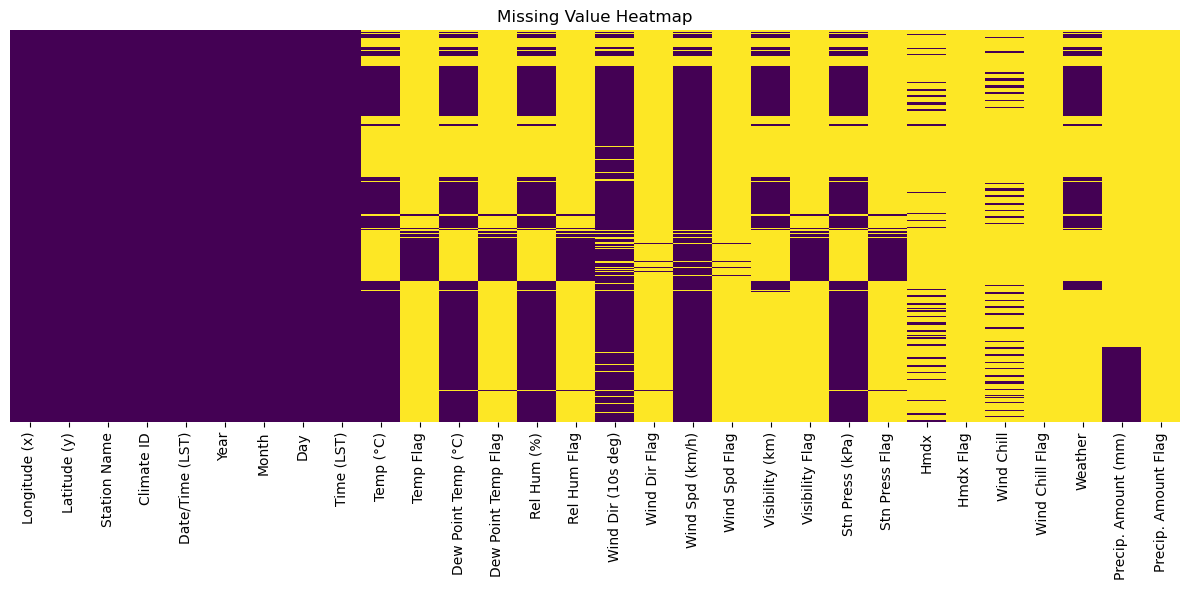

In [7]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.tight_layout()
plt.show()

In [8]:
# Analyze categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nUnique values in categorical columns:")
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()}")
    print(df[col].value_counts().head())
    print()


Unique values in categorical columns:
Station Name: 3
Station Name
SARNIA AIRPORT             330832
SARNIA CLIMATE             165302
SARNIA CHRIS HADFIELD A      2338
Name: count, dtype: int64

Date/Time (LST): 498472
Date/Time (LST)
1967-12-01 08:00:00    1
10/31/2005 22:00       1
11/2/2005 2:00         1
11/2/2005 1:00         1
11/2/2005 0:00         1
Name: count, dtype: int64

Time (LST): 34
Time (LST)
19:00    20772
23:00    20772
10:00    20772
11:00    20772
12:00    20772
Name: count, dtype: int64

Temp Flag: 1
Temp Flag
M    53324
Name: count, dtype: int64

Dew Point Temp Flag: 1
Dew Point Temp Flag
M    54155
Name: count, dtype: int64

Rel Hum Flag: 1
Rel Hum Flag
M    54154
Name: count, dtype: int64

Wind Dir Flag: 1
Wind Dir Flag
M    1359
Name: count, dtype: int64

Wind Spd Flag: 2
Wind Spd Flag
M    1324
E      78
Name: count, dtype: int64

Visibility Flag: 1
Visibility Flag
M    53254
Name: count, dtype: int64

Stn Press Flag: 1
Stn Press Flag
M    54423
Name: count

## Data Cleaning and Preprocessing <a id="3"></a>


###  Removal of Unnecessary Columns

The following columns were removed as they were not needed for the analysis:
- Longitude (x)
- Latitude (y)
- Station Name
- Climate ID

These columns contained information about the weather stations, which was deemed irrelevant for the time-series analysis.

###  Datetime Formatting

The datetime formatting was addressed through the following steps:

1. The 'Date/Time (LST)' column was converted to a proper datetime format.
2. Time was extracted from the new datetime format into a separate 'Time' column.
3. The original 'Time (LST)' and 'Date/Time (LST)' columns were dropped.

### Column Reordering

The columns were reordered to position the new 'Time' column after 'Day' for improved organization and readability.

### Results

Following these cleaning steps, the dataset now features:
- A reduced number of columns, focusing solely on relevant weather data
- Properly formatted datetime information
- A more streamlined structure for further analysis



In [9]:
# 1. Remove Longitude, Latitude, and Climate ID
df = df.drop(['Longitude (x)', 'Latitude (y)', 'Climate ID'], axis=1)

# 2. Remove all flag columns
flag_columns = [col for col in df.columns if 'Flag' in col]
df = df.drop(flag_columns, axis=1)

# 3. Convert 'Date/Time (LST)' to correct datetime format
df['Date/Time (LST)'] = pd.to_datetime(df['Date/Time (LST)'], format='mixed')

# 4. Get the position of 'Time (LST)' column
time_lst_position = df.columns.get_loc('Time (LST)')

# 5. Extract hour from the corrected datetime and insert it in the position of 'Time (LST)'
df.insert(time_lst_position, 'Hour', df['Date/Time (LST)'].dt.hour)

# 6. Remove 'Time (LST)' column
df = df.drop('Time (LST)', axis=1)

# 7. Sort the dataframe by the datetime column
df = df.sort_values('Date/Time (LST)')

# 8. Reset index after sorting
df = df.reset_index(drop=True)

# Display the first few rows and data info to verify changes
print(df.head())
print(df.info())


     Station Name     Date/Time (LST)  Year  Month  Day  Hour  Temp (°C)  \
0  SARNIA AIRPORT 1967-12-01 08:00:00  1967     12    1     8       -7.2   
1  SARNIA AIRPORT 1967-12-01 09:00:00  1967     12    1     9       -5.0   
2  SARNIA AIRPORT 1967-12-01 10:00:00  1967     12    1    10       -2.8   
3  SARNIA AIRPORT 1967-12-01 11:00:00  1967     12    1    11       -1.1   
4  SARNIA AIRPORT 1967-12-01 12:00:00  1967     12    1    12        0.6   

   Dew Point Temp (°C)  Rel Hum (%)  Wind Dir (10s deg)  Wind Spd (km/h)  \
0                 -9.4         83.0                 9.0             10.0   
1                 -8.9         74.0                11.0             13.0   
2                 -7.2         70.0                11.0             16.0   
3                 -7.8         62.0                14.0             18.0   
4                 -6.7         58.0                14.0             24.0   

   Visibility (km)  Stn Press (kPa)  Hmdx  Wind Chill        Weather  \
0             

## Missing Data Analysis in Weather Dataset <a id="4"></a>


An analysis of missing data patterns in the weather dataset has been conducted. The percentage of missing data across different variables, hours of the day, and years has been examined. This analysis aids in understanding the completeness of the data and identifying any systematic patterns in data gaps.



### Key Findings

1. **Hourly Patterns**: 
   - A significant pattern of missing data has been observed across different hours of the day. The percentage of missing data is consistently higher during the nighttime hours, particularly between 22:00 and 05:00.
   - The variables most affected by this hourly pattern are Visibility, Wind Chill, and Humidex.
   - Weather and Precipitation Amount show relatively consistent levels of missing data across all hours.
   
   
   

2. **Variable Completeness**:
   - The variables with the highest percentages of missing data are Humidex (89.7%), Wind Chill (86.1%), and Visibility (70.0%).
   - Temperature, Dew Point Temperature, and Relative Humidity have the lowest percentages of missing data, all around 37%.
   - Precipitation Amount has a moderate level of missing data at 81.1%.
   

3. **Yearly Trends**:
   - A significant improvement in data completeness has been observed over the years for most variables.
   - The early years of the dataset (likely the 1970s) show very high percentages of missing data for almost all variables.
   - A notable improvement is seen around the late 1990s or early 2000s, with a sharp decrease in missing data percentages.
   - In recent years, the percentage of missing data has stabilized for most variables, with some approaching near-complete data collection.
   

4. **Variable-Specific Insights**:
   - Humidex and Wind Chill show similar patterns, with high percentages of missing data overall and strong hourly variations. This is likely due to these variables being derived from other measurements and only calculated under specific conditions.
   - Visibility data is particularly sparse during nighttime hours, which may be due to measurement difficulties in low-light conditions.
   - Precipitation Amount shows consistent levels of missing data across hours and years, suggesting a systematic issue with data collection for this variable.
   - Temperature, Dew Point Temperature, and Relative Humidity are the most consistently recorded variables, with low and stable percentages of missing data across hours and years.




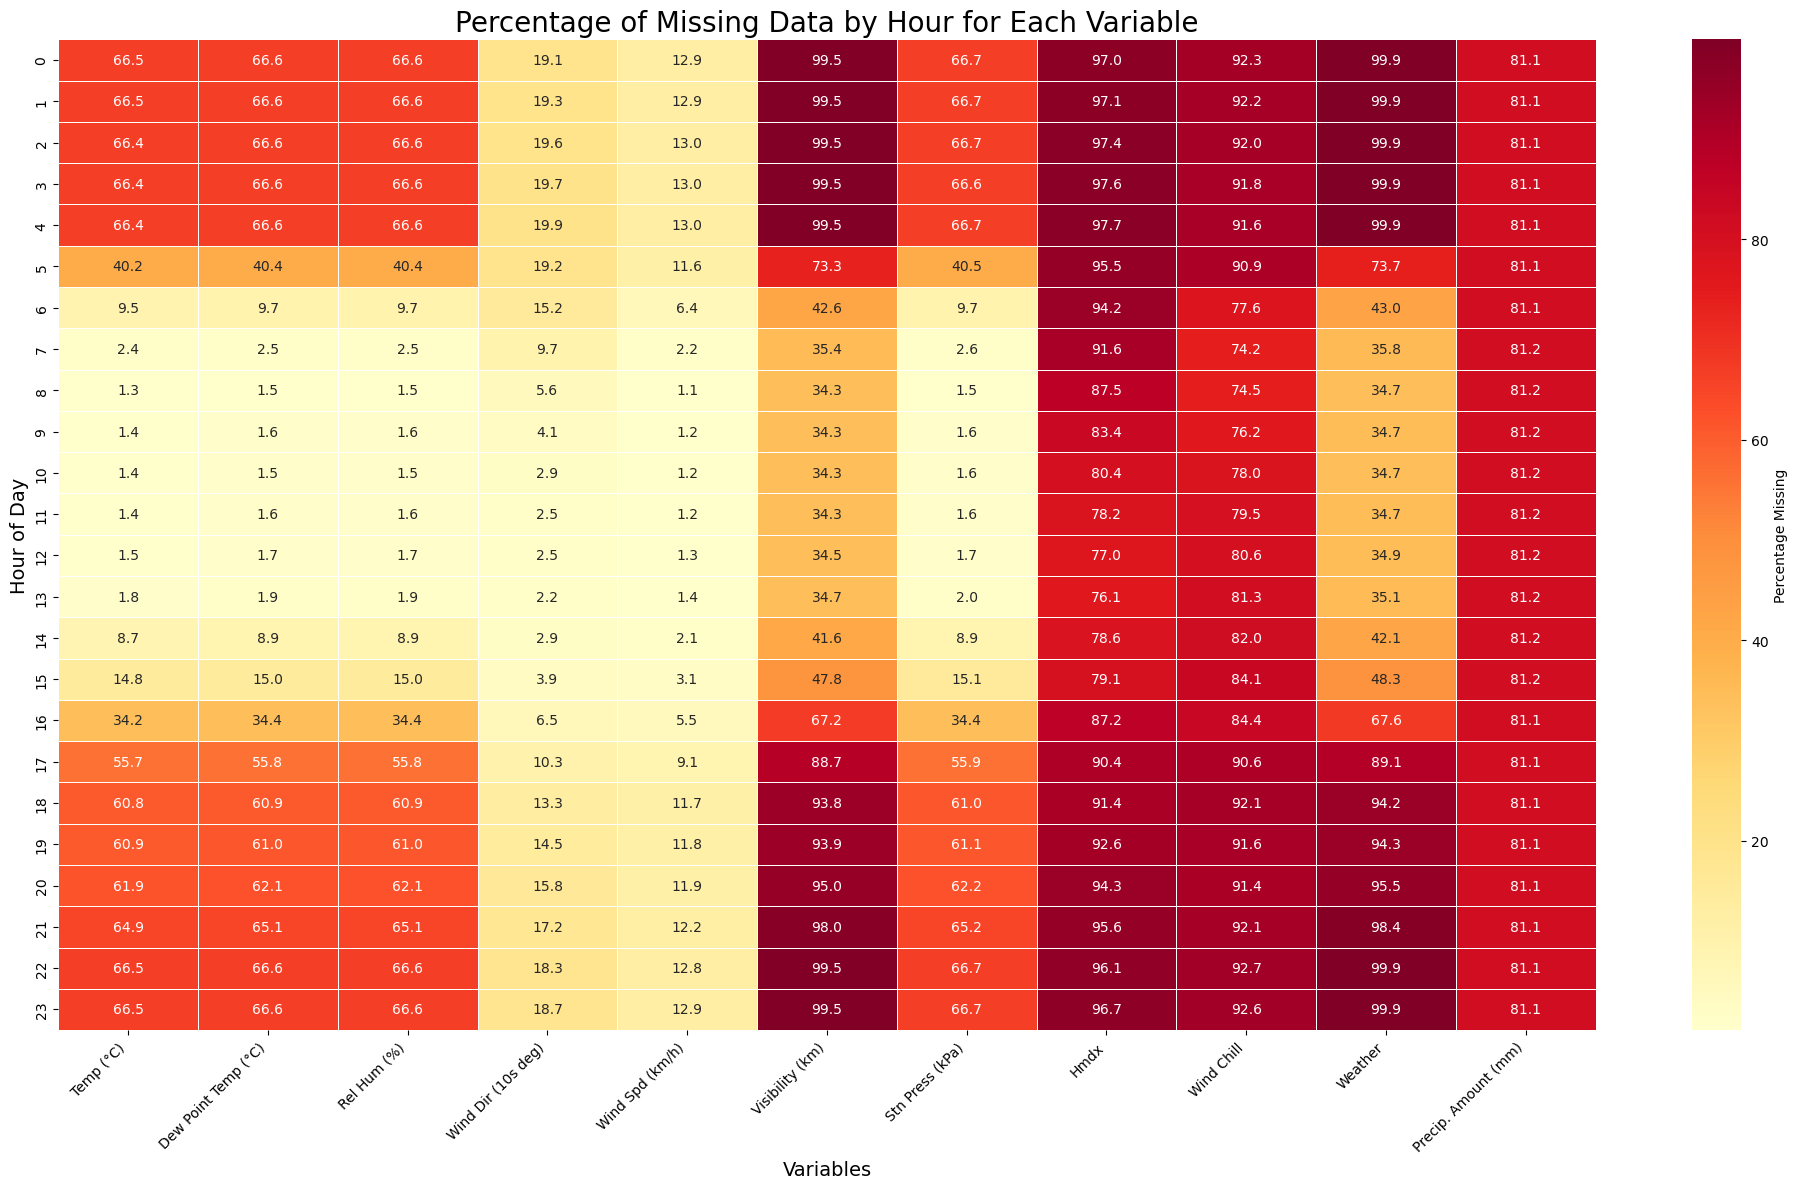

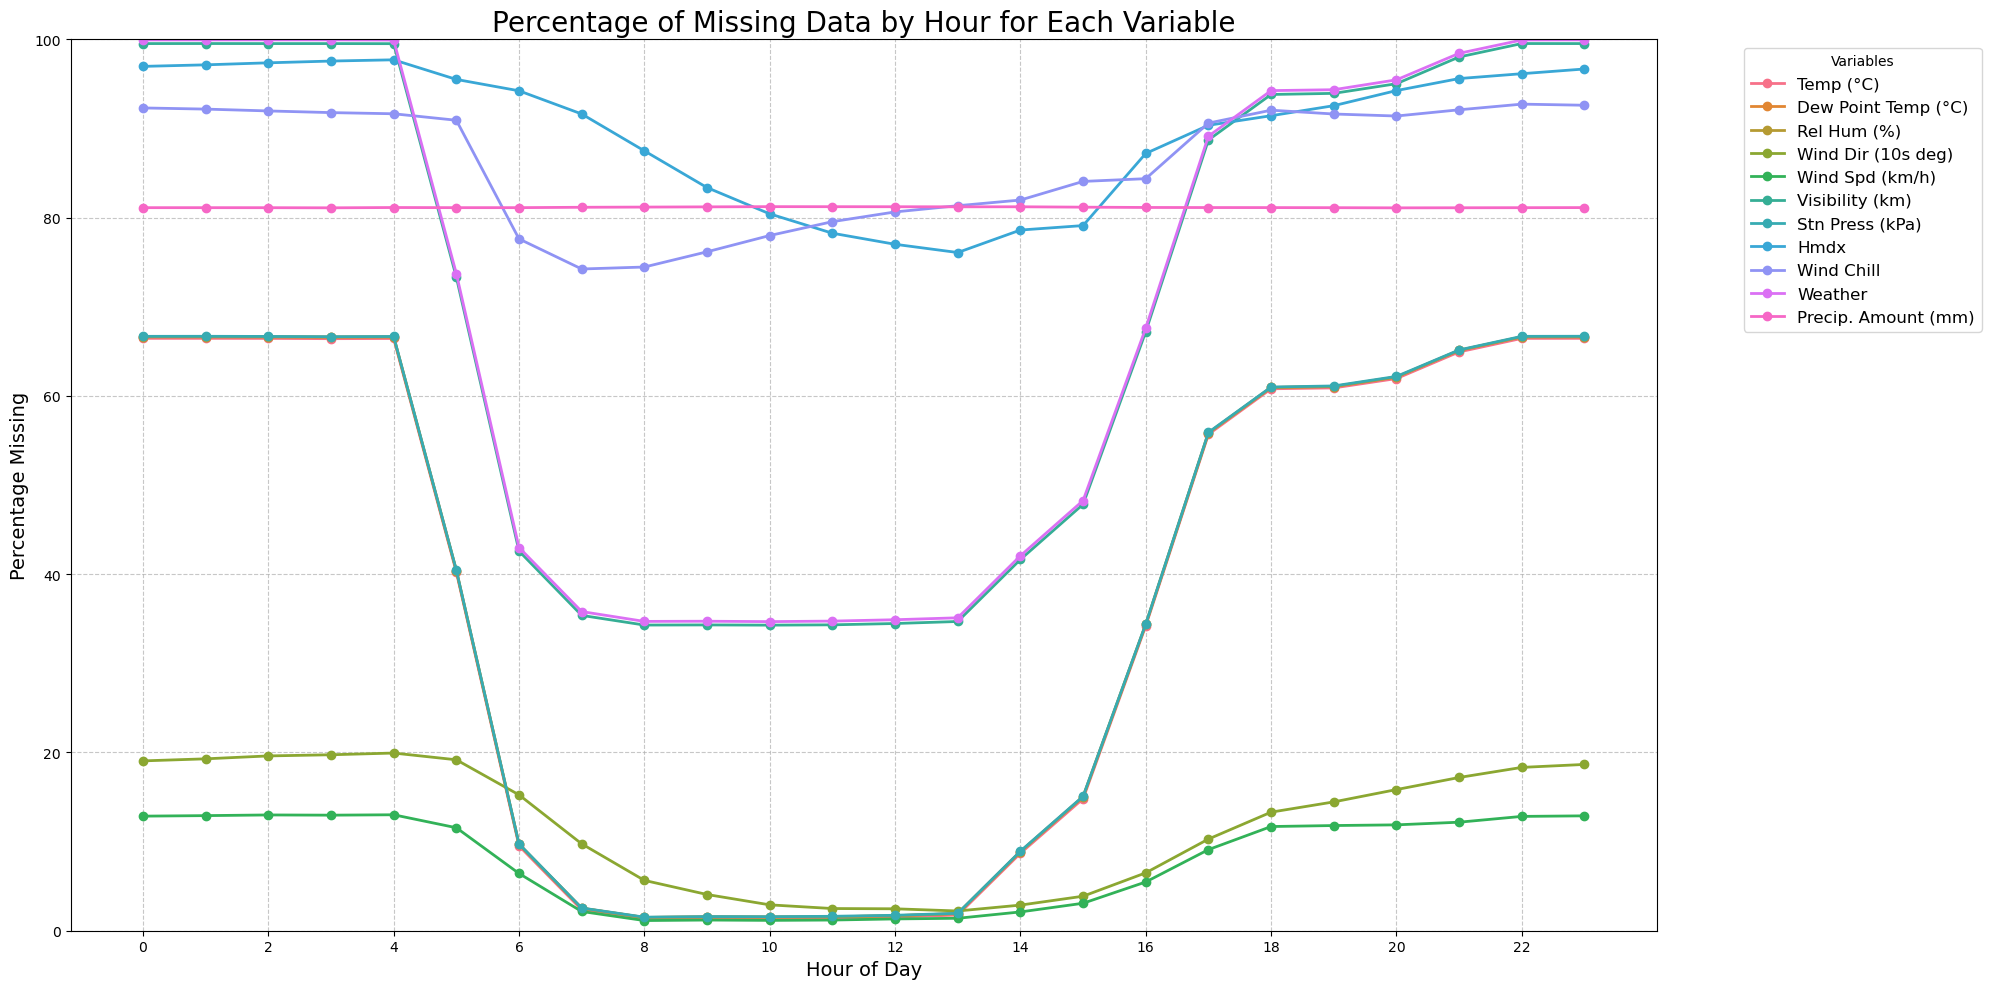

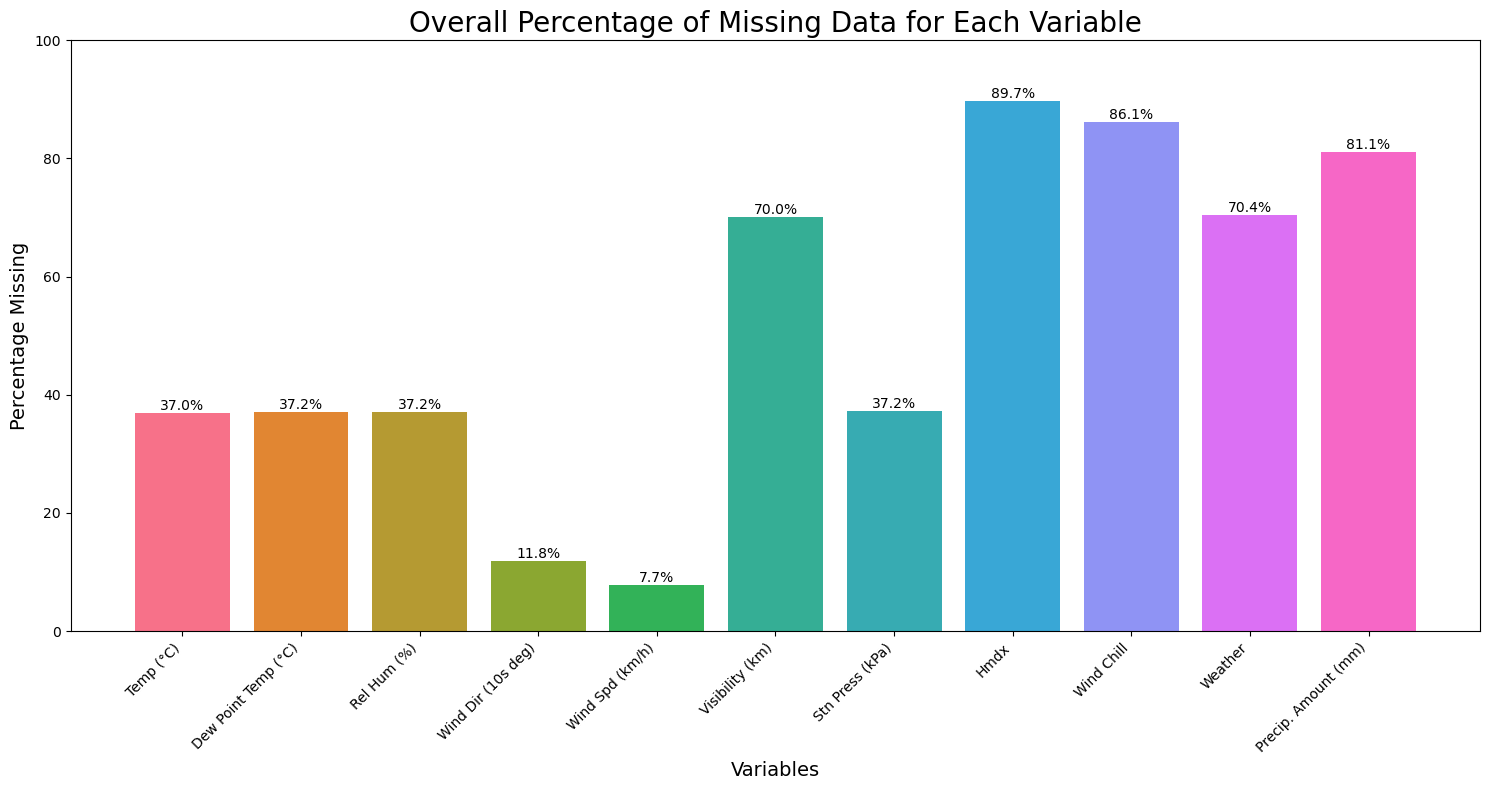

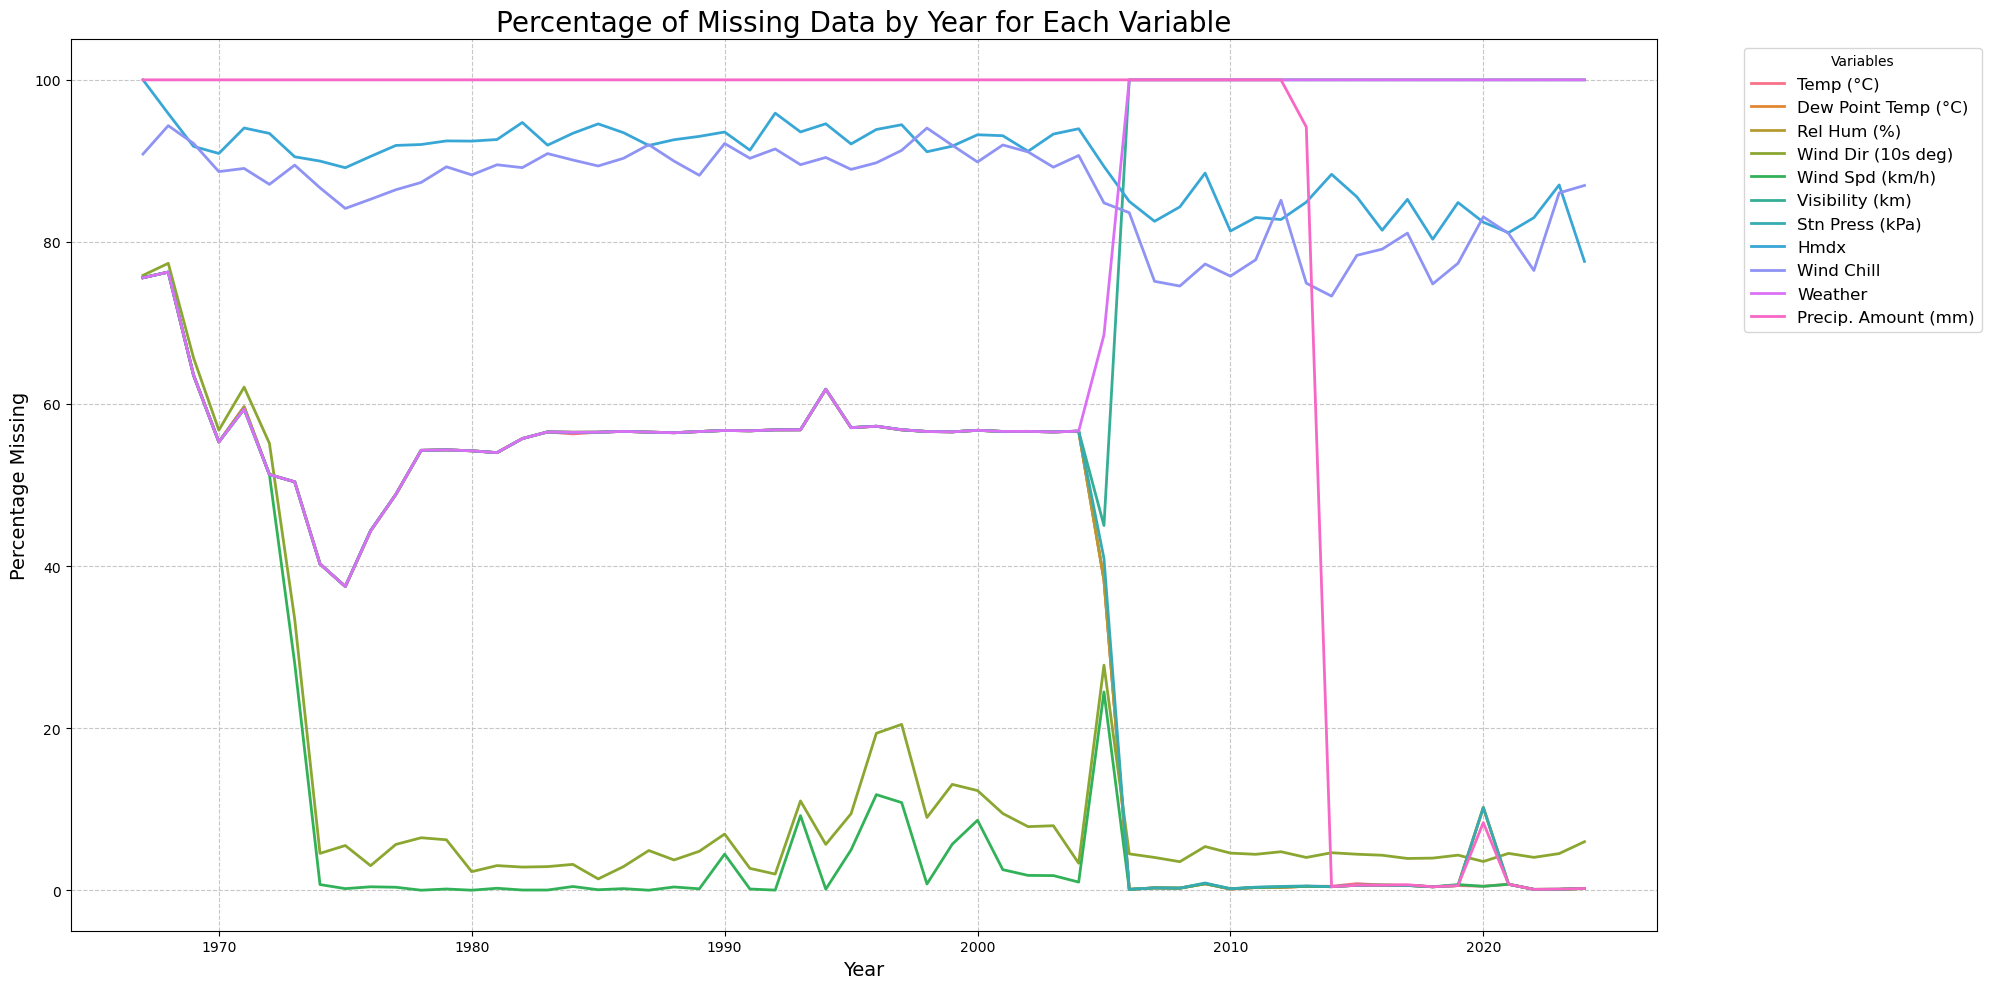

In [10]:
# List of variables to analyze
variables = [
    'Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)', 'Wind Dir (10s deg)',
    'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Hmdx',
    'Wind Chill', 'Weather', 'Precip. Amount (mm)'
]

# Create a dictionary to store missing data percentages
missing_data = {var: [] for var in variables}

# Calculate percentage of missing data for each hour and variable
for hour in range(24):
    hour_data = df[df['Hour'] == hour]
    for var in variables:
        missing_percent = (hour_data[var].isna().sum() / len(hour_data)) * 100
        missing_data[var].append(missing_percent)

# Create a DataFrame from the missing data dictionary
missing_df = pd.DataFrame(missing_data, index=range(24))

# Set up a custom color palette
custom_palette = sns.color_palette("husl", n_colors=len(variables))

# Improved heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(missing_df, cmap='YlOrRd', annot=True, fmt='.1f', 
            cbar_kws={'label': 'Percentage Missing'}, linewidths=0.5)
plt.title('Percentage of Missing Data by Hour for Each Variable', fontsize=20)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Hour of Day', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('missing_data_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Improved line graphs
fig, ax = plt.subplots(figsize=(20, 10))
for i, var in enumerate(variables):
    ax.plot(range(24), missing_df[var], marker='o', linewidth=2, markersize=6, label=var, color=custom_palette[i])

ax.set_title('Percentage of Missing Data by Hour for Each Variable', fontsize=20)
ax.set_xlabel('Hour of Day', fontsize=14)
ax.set_ylabel('Percentage Missing', fontsize=14)
ax.set_ylim(0, 100)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(title='Variables', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
ax.set_xticks(range(0, 24, 2))
plt.tight_layout()
plt.savefig('missing_data_by_hour.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate overall percentage of missing data for each variable
overall_missing = df[variables].isna().mean() * 100

# Improved bar plot for overall missing data
plt.figure(figsize=(15, 8))
bars = plt.bar(range(len(variables)), overall_missing, color=custom_palette)
plt.title('Overall Percentage of Missing Data for Each Variable', fontsize=20)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Percentage Missing', fontsize=14)
plt.xticks(range(len(variables)), variables, rotation=45, ha='right')
plt.ylim(0, 100)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.tight_layout()
plt.savefig('overall_missing_data.png', dpi=300, bbox_inches='tight')
plt.show()

# Investigate missing data patterns over time for each variable
yearly_missing = df.groupby(df['Date/Time (LST)'].dt.year)[variables].apply(lambda x: x.isna().mean() * 100)

# Improved line plot for yearly trends
plt.figure(figsize=(20, 10))
for i, var in enumerate(variables):
    plt.plot(yearly_missing.index, yearly_missing[var], linewidth=2, label=var, color=custom_palette[i])

plt.title('Percentage of Missing Data by Year for Each Variable', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage Missing', fontsize=14)
plt.legend(title='Variables', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('missing_data_by_year.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
df.to_csv('df_cleaned.csv', index=False)

In [12]:
df = pd.read_csv('df_cleaned.csv', low_memory=False)

# Handling the missing values <a id="5"></a>

## Data Imputation Process

### General Data Handling (`fill_missing_data` function)

The process begins with the conversion of the 'Date/Time (LST)' column to datetime format, ensuring consistent temporal handling. The dataset is then sorted chronologically to maintain the integrity of time-series operations.

For the majority of weather variables (temperature, dew point, relative humidity, wind speed, visibility, and station pressure), missing values are imputed using a combination of forward and backward filling. This method is employed due to the typically continuous nature of these variables, where adjacent values in time are considered good estimators for missing data.

Wind direction, being a circular variable, is treated differently. Missing values in this column are filled with the median of the available data, as it is deemed a more robust measure for circular data than mean or interpolation.

Precipitation data undergoes a more sophisticated imputation process, which is detailed in a separate function.

After the primary variables are imputed, derived variables such as Humidex and Wind Chill are recalculated to ensure consistency with the newly filled data.

Lastly, missing weather condition data is filled with the most frequent value within the same day, preserving daily weather patterns while providing reasonable estimates for missing data points.

### Precipitation Data Handling (`fill_precipitation_with_flag` and `fill_with_averages` functions)

The precipitation imputation process is given special attention due to the discrete and often sporadic nature of rainfall data.

Initially, a flag column is created to mark imputed values, allowing for later analysis of the imputation's impact. Short gaps (up to 24 hours) in the precipitation data are filled using linear interpolation, based on the assumption that short-term precipitation patterns may be reasonably approximated linearly.

For longer gaps, a more sophisticated method is employed:
1. The data is categorized by season, month, and day.
2. Average precipitation values are calculated for each unique combination of season, month, and day, using data from 2013 onwards to capture recent climate patterns.
3. These averages are then used to fill the remaining missing values.

This approach is chosen to respect the seasonal and daily patterns in precipitation while avoiding the introduction of unrealistic values.

## Data Analysis

### Comparative Analysis (`compare_before_after` function)

After imputation, a comparative analysis is performed. The mean and standard deviation of each numeric variable are compared before and after imputation. This step is crucial for understanding how the imputation process has affected the overall distribution of the data.

### Outlier Detection (`detect_outliers` function)

Outliers are identified using the Z-score method, with a threshold of 3 standard deviations. This approach is applied to key weather variables including temperature, wind speed, visibility, and precipitation amount. The identification of outliers is important for understanding extreme weather events and potential data anomalies.

### Precipitation Pattern Analysis (`analyze_precipitation_patterns` function)

A detailed analysis of precipitation patterns is conducted, including:
- Monthly precipitation totals
- Number of rainy days per month
- Precipitation intensity (average precipitation on rainy days)




In [21]:
def fill_missing_data(df):
    # Convert Date/Time (LST) to datetime if not already
    df['Date/Time (LST)'] = pd.to_datetime(df['Date/Time (LST)'])
    
    # Sort the dataframe by date and time
    df = df.sort_values('Date/Time (LST)')

    # Fill missing values for weather-related variables (except precipitation)
    weather_vars = ['Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)', 
                    'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)']
    for var in weather_vars:
        df[var] = df[var].ffill().bfill()

    # Fill Wind Direction with median (circular variable)
    df['Wind Dir (10s deg)'] = df['Wind Dir (10s deg)'].fillna(
        df['Wind Dir (10s deg)'].median()
    )

    # Handle precipitation with advanced imputation
    df = fill_precipitation_with_flag(df)

    # Recalculate Humidex and Wind Chill
    df['Hmdx'] = calculate_humidex(df['Temp (°C)'], df['Rel Hum (%)'])
    df['Wind Chill'] = calculate_wind_chill(df['Temp (°C)'], df['Wind Spd (km/h)'])

    # Fill Weather with most frequent value within the same day
    df['Date'] = df['Date/Time (LST)'].dt.date
    df['Weather'] = df.groupby('Date')['Weather'].transform(
        lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown')
    )
    df = df.drop('Date', axis=1)

    return df

def fill_precipitation_with_flag(df):
    # Add a flag column to mark imputed values
    df['Precip_Flag'] = df['Precip. Amount (mm)'].isna().astype(int)
    
    # First, use linear interpolation for short gaps
    df['Precip. Amount (mm)'] = df['Precip. Amount (mm)'].interpolate(
        method='linear', limit_direction='both', limit=24  # Limit to 24 hours
    )

    # For remaining NaNs, fill with seasonal/daily averages
    df = fill_with_averages(df)
    
    return df

def fill_with_averages(df):
    # Extract date components and seasons
    df['Month'] = df['Date/Time (LST)'].dt.month
    df['Day'] = df['Date/Time (LST)'].dt.day
    df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2]
                                                  else 'Spring' if x in [3, 4, 5]
                                                  else 'Summer' if x in [6, 7, 8]
                                                  else 'Fall')

    # Calculate seasonal and daily averages from 2013 onward
    precip_averages = df[df['Date/Time (LST)'].dt.year >= 2013].groupby(
        ['Season', 'Month', 'Day']
    )['Precip. Amount (mm)'].mean().reset_index()

    # Create a mapping dictionary
    precip_map = precip_averages.set_index(
        ['Season', 'Month', 'Day']
    )['Precip. Amount (mm)'].to_dict()

    # Function to get average precipitation for a given date
    def get_avg_precip(season, month, day):
        return precip_map.get((season, month, day), 0)  # Default to 0 if not found

    # Apply the average precipitation filling
    mask = df['Precip. Amount (mm)'].isna()
    df.loc[mask, 'Precip. Amount (mm)'] = df[mask].apply(
        lambda row: get_avg_precip(row['Season'], row['Month'], row['Day']), axis=1
    )

    # Drop temporary columns
    df = df.drop(['Season', 'Month', 'Day'], axis=1)

    return df

def calculate_humidex(temp, rel_hum):
    # Simple Humidex calculation (approximation)
    return temp + 0.5555 * (
        6.11 * np.exp(5417.7530 * (1/273.16 - 1/(temp + 273.15))) * rel_hum / 100 - 10
    )

def calculate_wind_chill(temp, wind_speed):
    # Wind chill calculation formula
    return 13.12 + 0.6215 * temp - 11.37 * (wind_speed**0.16) + 0.3965 * temp * (wind_speed**0.16)

def compare_before_after(df_original, df_filled):
    # Compare the mean and std deviation before and after filling
    for column in df_original.columns:
        if column in df_filled.columns and df_original[column].dtype in ['float64', 'int64']:
            before_mean = df_original[column].mean()
            after_mean = df_filled[column].mean()
            before_std = df_original[column].std()
            after_std = df_filled[column].std()
            print(f"{column}:")
            print(f"  Before - Mean: {before_mean:.2f}, Std: {before_std:.2f}")
            print(f"  After  - Mean: {after_mean:.2f}, Std: {after_std:.2f}")
            print()

def detect_outliers(df, columns, threshold=3):
    # Detect outliers using the Z-score method
    outliers = {}
    for column in columns:
        z_scores = np.abs(stats.zscore(df[column].dropna()))
        outliers[column] = df[z_scores > threshold]
    return outliers

def analyze_precipitation_patterns(df):
    # Monthly precipitation totals
    monthly_precip = df.groupby(df['Date/Time (LST)'].dt.to_period('M'))['Precip. Amount (mm)'].sum()
    print("Monthly Precipitation Totals:")
    print(monthly_precip.describe())
    print("\nTop 5 Wettest Months:")
    print(monthly_precip.nlargest(5))
    
    # Rainy days per month
    rainy_days = df[df['Precip. Amount (mm)'] > 0].groupby(df['Date/Time (LST)'].dt.to_period('M')).size()
    print("\nRainy Days per Month:")
    print(rainy_days.describe())

    # Precipitation intensity (average precipitation on rainy days)
    precip_intensity = monthly_precip / rainy_days
    print("\nPrecipitation Intensity (mm/rainy day):")
    print(precip_intensity.describe())

# Main execution
def main(df):
    df_filled = fill_missing_data(df)

    compare_before_after(df, df_filled)

    weather_columns = ['Temp (°C)', 'Wind Spd (km/h)', 'Visibility (km)', 'Precip. Amount (mm)']
    outliers = detect_outliers(df_filled, weather_columns)

    for column, outlier_data in outliers.items():
        print(f"Outliers in {column}:")
        print(outlier_data.head())
        print(f"Total outliers: {len(outlier_data)}\n")

    # Analyze precipitation patterns
    analyze_precipitation_patterns(df_filled)

    # Calculate percentage of imputed precipitation values
    imputed_percentage = (df_filled['Precip_Flag'].sum() / len(df_filled)) * 100
    print(f"\nPercentage of imputed precipitation values: {imputed_percentage:.2f}%")

    df_filled.to_csv('filled_data.csv', index=False)
    
    return df_filled

if __name__ == "__main__":
    df = pd.read_csv('df_cleaned.csv', low_memory=False)  
    filled_df = main(df)

Year:
  Before - Mean: 1995.86, Std: 16.42
  After  - Mean: 1995.86, Std: 16.42

Hour:
  Before - Mean: 11.50, Std: 6.92
  After  - Mean: 11.50, Std: 6.92

Temp (°C):
  Before - Mean: 9.08, Std: 10.77
  After  - Mean: 9.80, Std: 11.04

Dew Point Temp (°C):
  Before - Mean: 4.37, Std: 10.07
  After  - Mean: 4.46, Std: 10.03

Rel Hum (%):
  Before - Mean: 74.39, Std: 15.92
  After  - Mean: 71.83, Std: 16.58

Wind Dir (10s deg):
  Before - Mean: 19.73, Std: 9.96
  After  - Mean: 19.77, Std: 9.35

Wind Spd (km/h):
  Before - Mean: 15.28, Std: 9.18
  After  - Mean: 15.56, Std: 9.29

Visibility (km):
  Before - Mean: 17.39, Std: 8.19
  After  - Mean: 17.22, Std: 6.59

Stn Press (kPa):
  Before - Mean: 99.45, Std: 0.75
  After  - Mean: 99.44, Std: 0.75

Hmdx:
  Before - Mean: 30.17, Std: 3.88
  After  - Mean: 9.98, Std: 14.41

Wind Chill:
  Before - Mean: -10.94, Std: 5.70
  After  - Mean: 8.11, Std: 13.82

Precip. Amount (mm):
  Before - Mean: 0.09, Std: 0.69
  After  - Mean: 0.09, Std: 0.31

# Exploratory Data Analysis <a id="6"></a>


1. Temperature Over Time: Shows clear seasonal temperature cycles ranging from -30°C to 40°C over decades. No obvious long-term warming trend visible.

2. Temperature Distribution: Bimodal distribution with peaks around 0°C and 20°C, slightly skewed towards colder temperatures.

3. Wind Speed vs. Temperature: Inverse relationship; higher wind speeds correlate with lower temperatures. Data concentrated at lower wind speeds across all temperatures.

4. Monthly Temperature Distribution: July-August warmest, January-February coldest. Winter months show greater temperature variability than summer.

5. Correlation Heatmap: Strong positive correlations between temperature, dew point, and humidex. Negative correlation between humidity and temperature. Wind speed weakly correlated with most variables.

6. Wind Rose Diagram: Dominant winds from SSE and W-NW. Highest wind speeds (10+ km/h) most frequent from SSE.

7. Temperature and Precipitation: Seasonal temperature cycles evident. Precipitation mostly low, with occasional spikes. Most frequent weather condition is "Mostly Cloudy".

8. Seasonal Analysis: Summer warmest, winter coldest. Precipitation highest in summer. Wind speeds highest in winter. Humidity relatively consistent across seasons.

9. Extreme Weather Events: High temperatures increasing in frequency. Low temperatures and wind speeds relatively consistent. Extreme precipitation events more frequent in recent years.

10. Precipitation Trends: Annual precipitation varies, averaging 782.15 mm. Highest: 2018 (915.0 mm), Lowest: 1967 (43.91 mm). Recent years show increased variability.

11. Dew Point vs. Relative Humidity: Strong positive correlation. Higher dew points associate with higher relative humidity. Data clusters densely between 0-20°C dew point and 40-100% humidity.

12. Total Precipitation by Month: August has highest precipitation, February lowest. Summer months generally wetter than winter.

13. Average Hourly Temperature by Month: July-August warmest, January-February coldest. Clear daily and seasonal temperature patterns visible.

14. Wind Chill vs. Humidex: Strong positive correlation with some divergence. Wind chill values extend lower than humidex, showing colder perceived temperatures in windy conditions.

15. Daily Average Station Pressure: Fluctuates between ~97-102 kPa over time. No clear long-term trend, but shows regular short-term variations.

16. Temperature vs Wind Speed by Season: Shows scatter plots for each season. Winter has the widest temperature range. Summer has the narrowest range and highest temperatures. Wind speeds vary across all seasons, with some higher speeds in colder temperatures.

17. Temperature vs Relative Humidity by Season: Displays the relationship between temperature and humidity across seasons. Winter shows lower temperatures and variable humidity. Summer has higher temperatures and generally higher humidity. Spring and fall show transitions between the extremes.

18. Average Temperature by Hour of Day: Line graph showing diurnal temperature variation. Lowest temperatures occur early morning (around 6-7 AM). Highest temperatures in mid-afternoon (2-3 PM). Gradual cooling through evening and night.

19. Relative Humidity vs Dew Point Temperature by Season: Similar pattern to image 2, but using dew point instead of temperature. Shows clear seasonal differences in humidity and dew point relationships.

20. Yearly Temperature Trends: Line graph showing mean yearly temperatures with min-max range. Mean temperatures appear relatively stable over the years, with annual fluctuations. The temperature range (shaded area) varies considerably year to year.


In [22]:
df = pd.read_csv('filled_data.csv', low_memory=False)  

In [23]:
df['Date/Time (LST)'] = pd.to_datetime(df['Date/Time (LST)'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498472 entries, 0 to 498471
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Station Name         498472 non-null  object        
 1   Date/Time (LST)      498472 non-null  datetime64[ns]
 2   Year                 498472 non-null  int64         
 3   Hour                 498472 non-null  int64         
 4   Temp (°C)            498472 non-null  float64       
 5   Dew Point Temp (°C)  498472 non-null  float64       
 6   Rel Hum (%)          498472 non-null  float64       
 7   Wind Dir (10s deg)   498472 non-null  float64       
 8   Wind Spd (km/h)      498472 non-null  float64       
 9   Visibility (km)      498472 non-null  float64       
 10  Stn Press (kPa)      498472 non-null  float64       
 11  Hmdx                 498472 non-null  float64       
 12  Wind Chill           498472 non-null  float64       
 13  Weather       

C:\Users\user\AppData\Local\Temp\ipykernel_10544\991132465.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


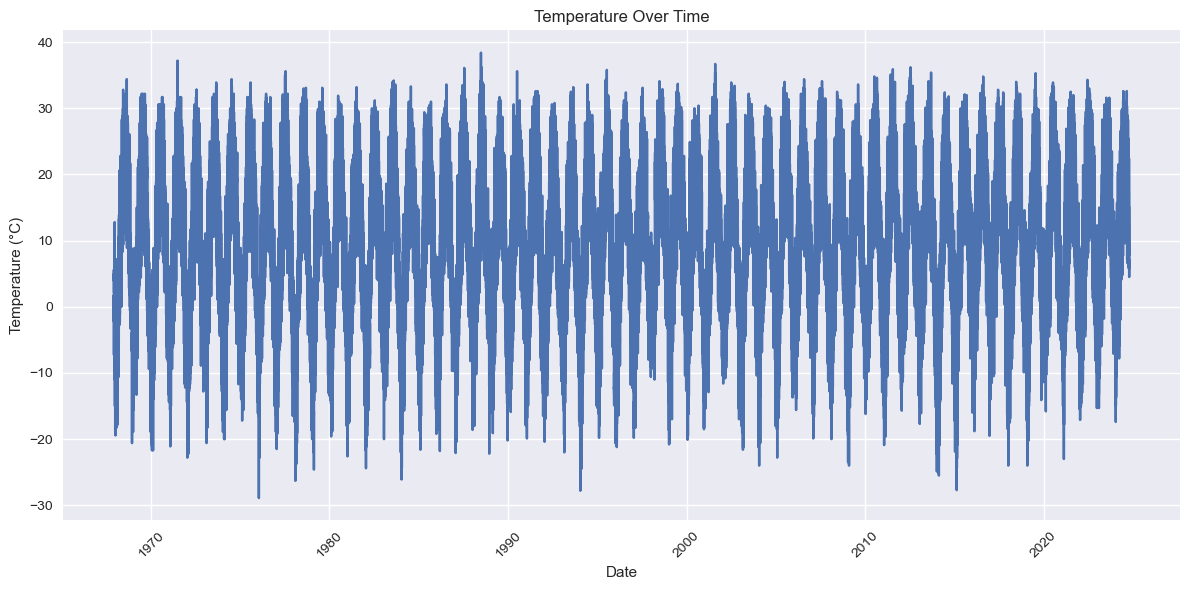

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


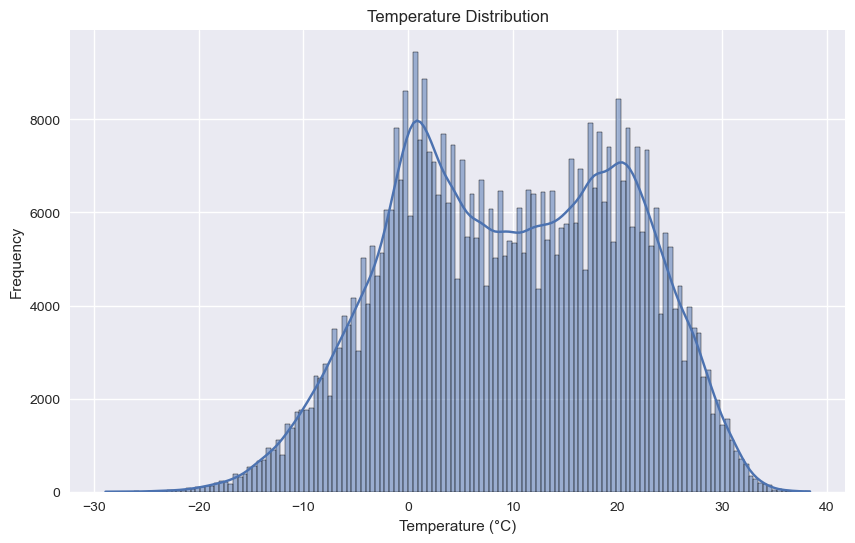

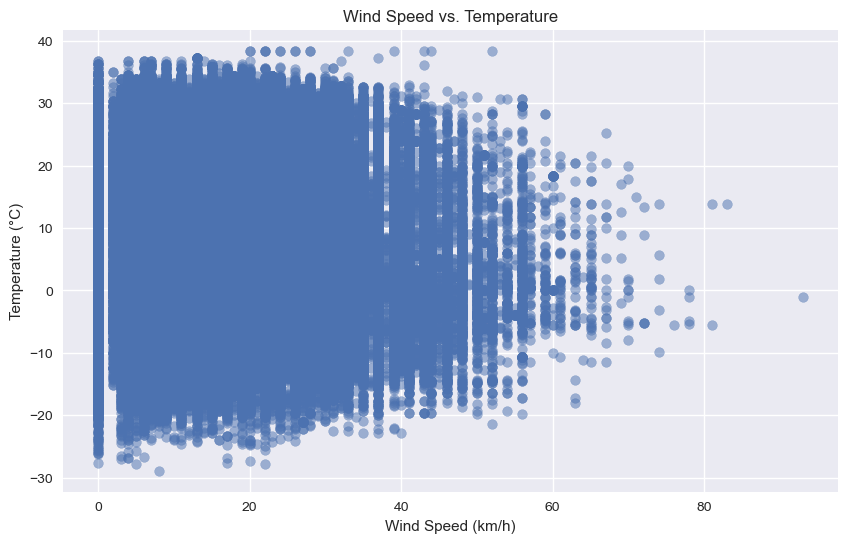

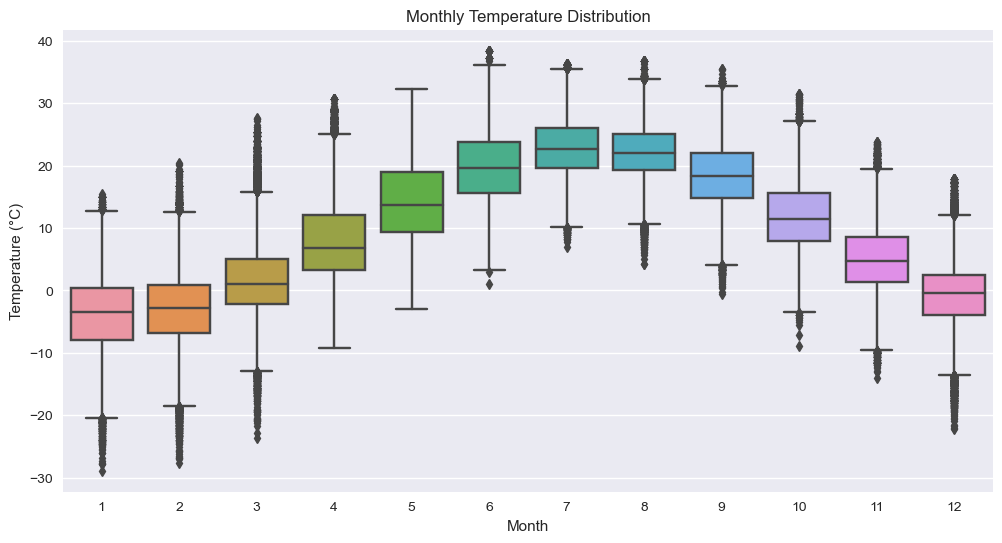

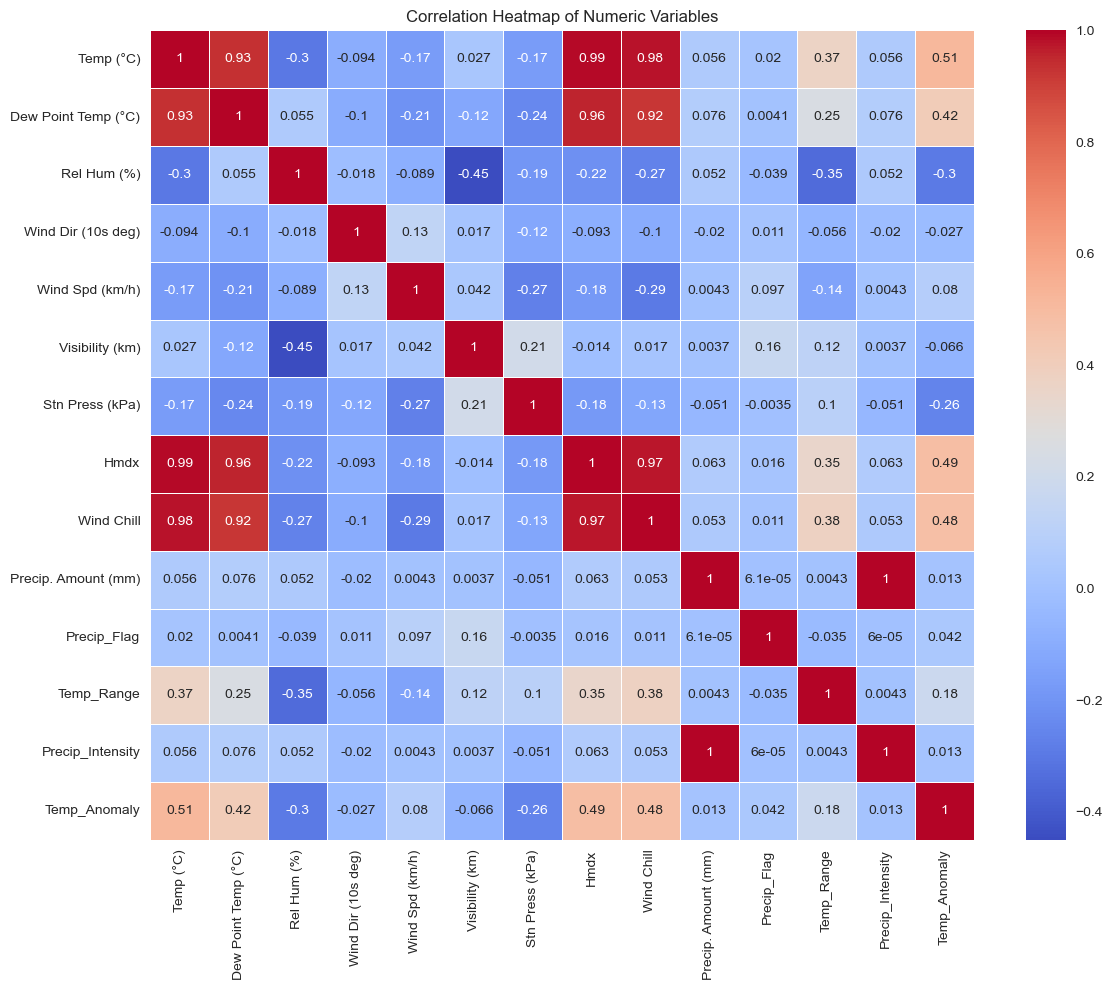

C:\Users\user\AppData\Local\Temp\ipykernel_10544\991132465.py:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_freq = df.groupby(['dir_bin', 'speed_bin']).size().unstack(fill_value=0)


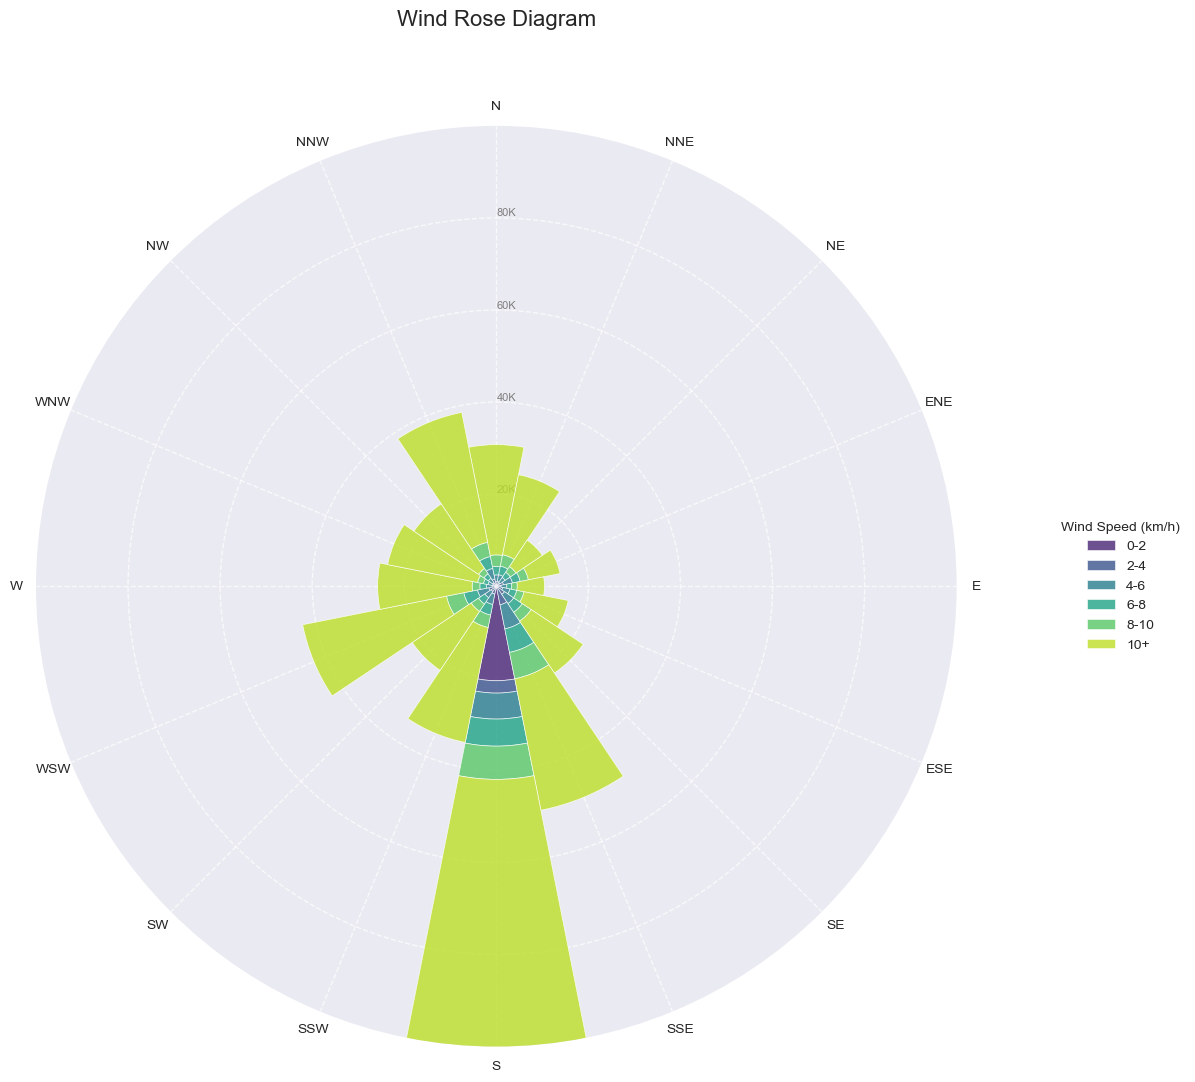

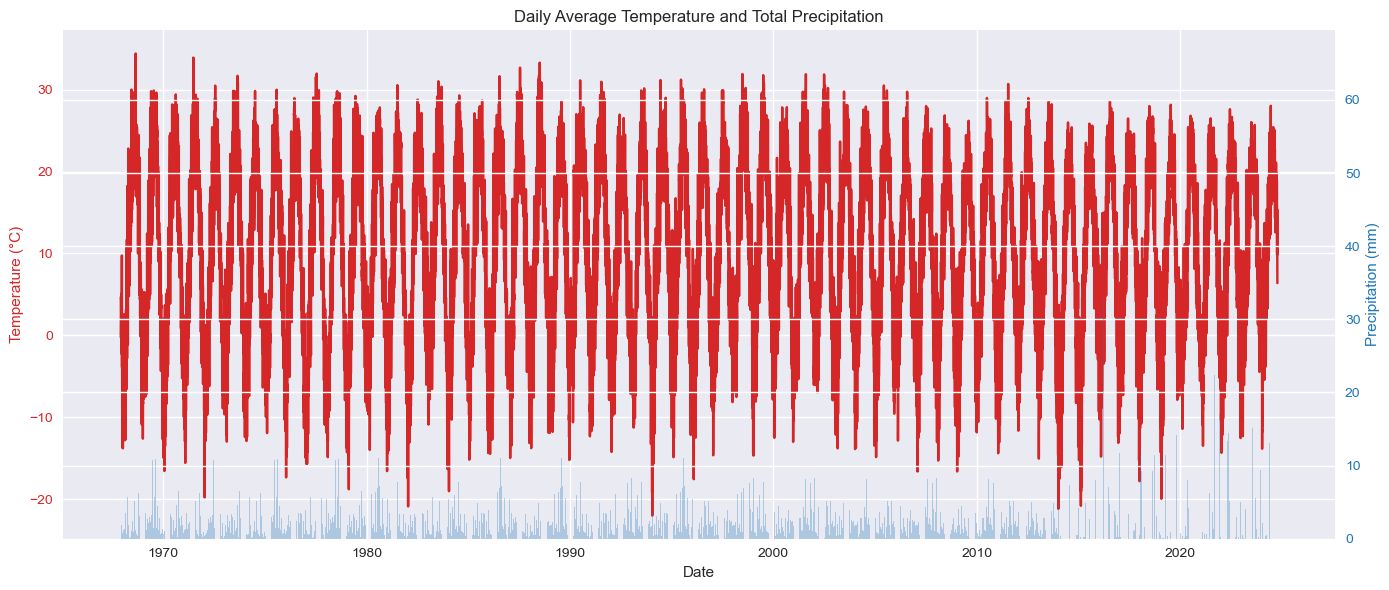

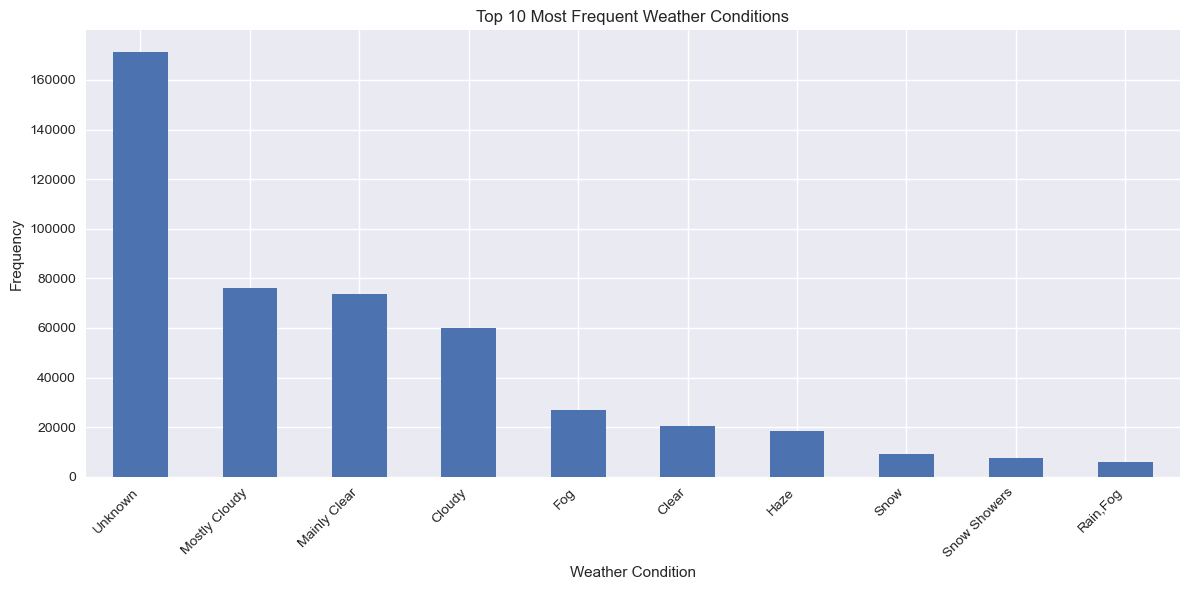

C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gr

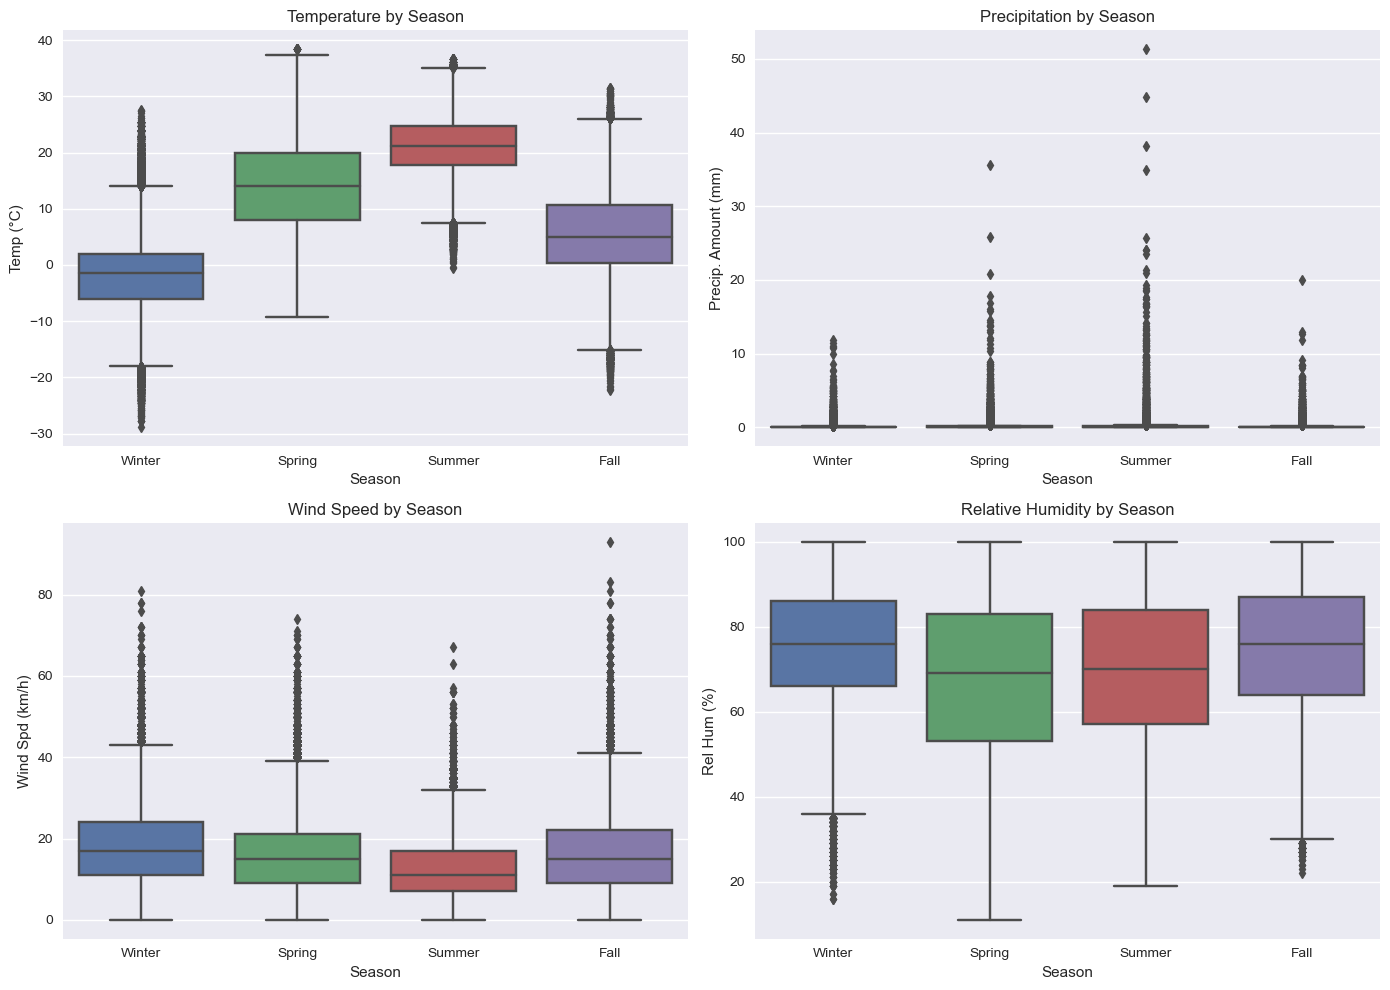

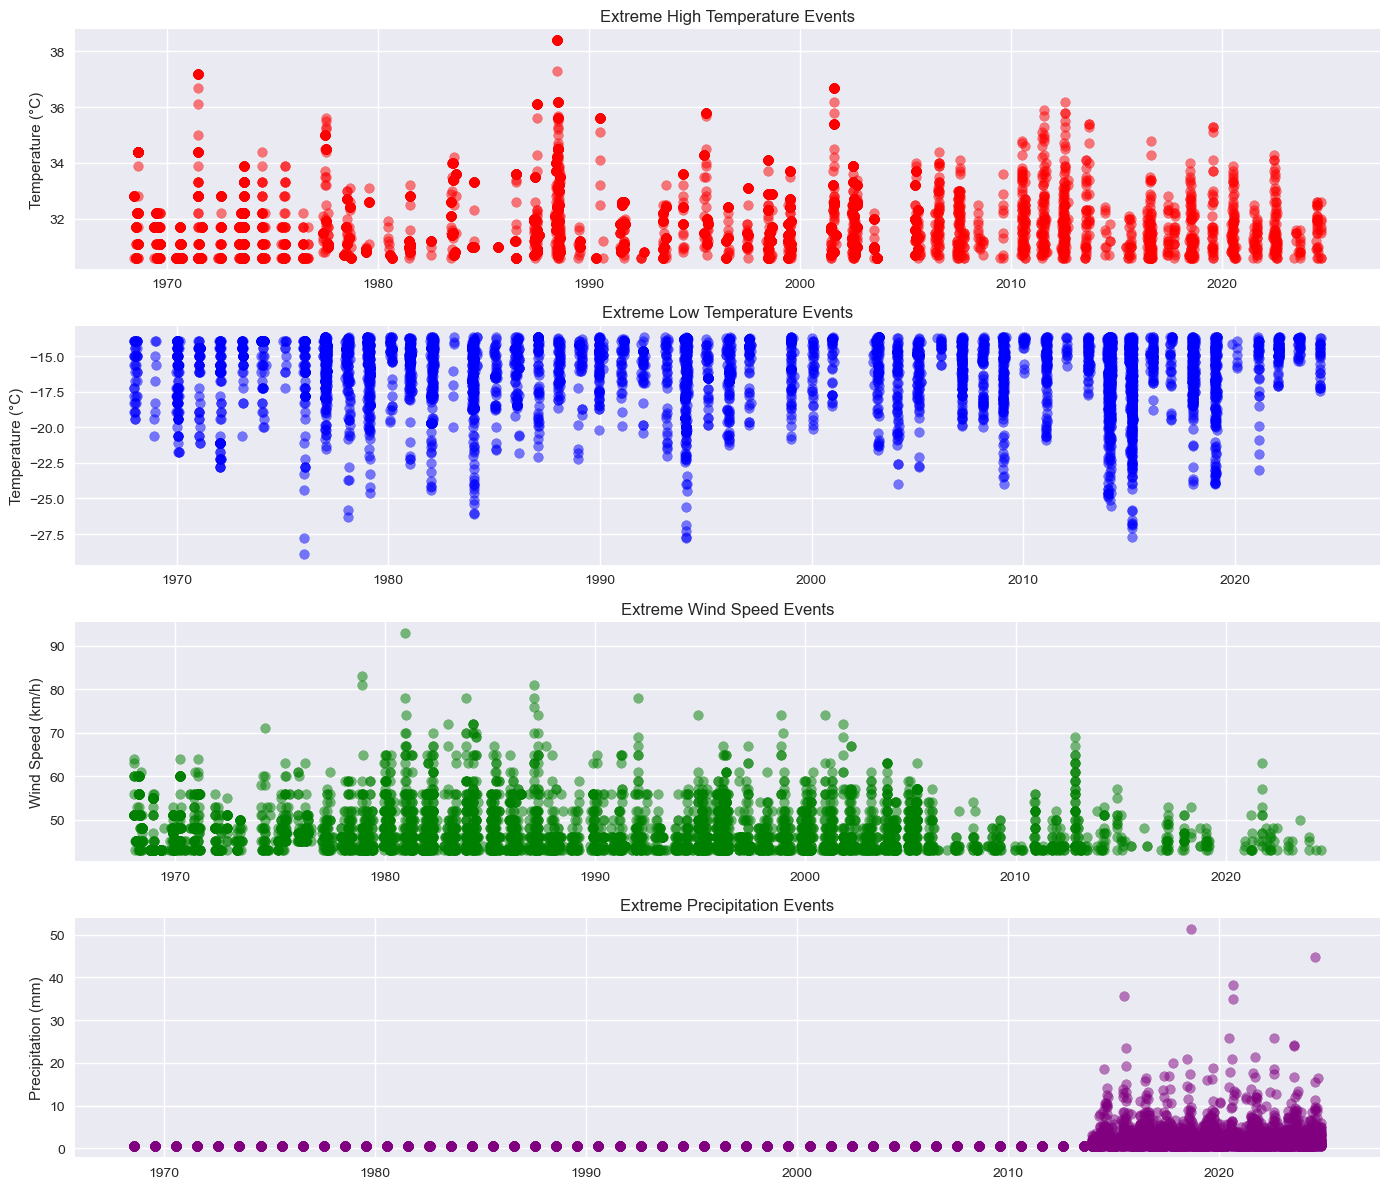

Number of extreme high temperature events: 5360
Number of extreme low temperature events: 5059
Number of extreme wind speed events: 5120
Number of extreme precipitation events: 5063


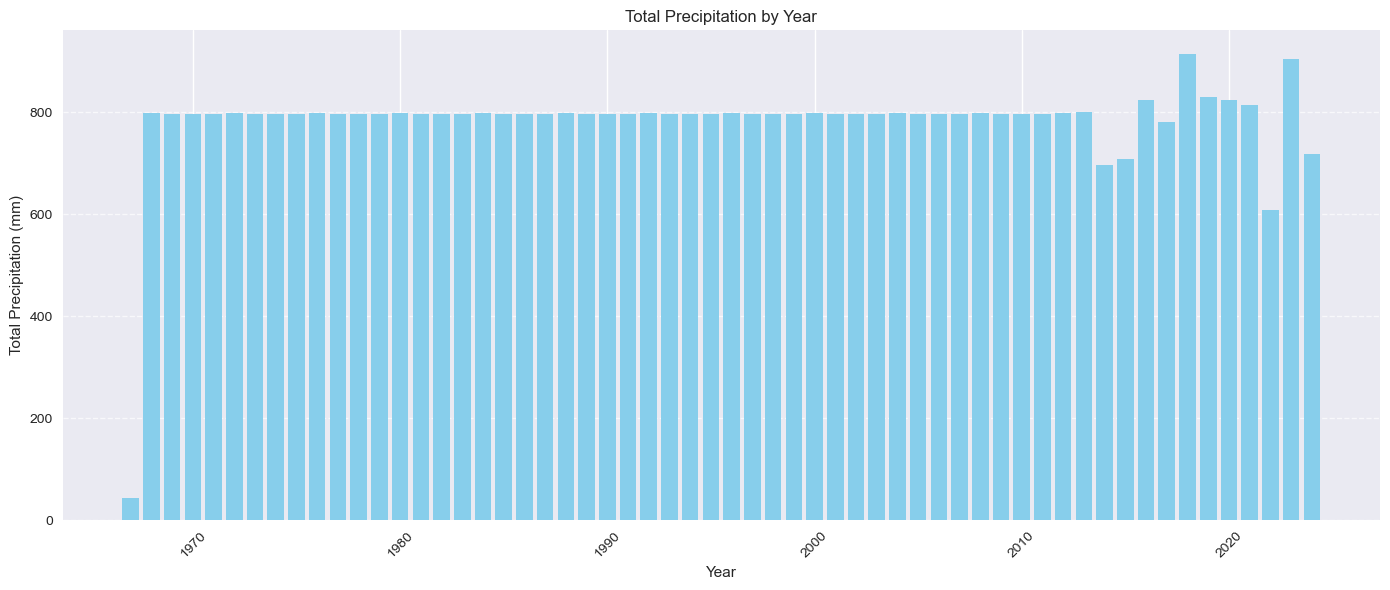

Average yearly precipitation: 782.15 mm
Year with highest precipitation: 2018.0 (915.00 mm)
Year with lowest precipitation: 1967.0 (43.91 mm)


In [40]:
# Set the style for all plots
plt.style.use('seaborn')

# 1. Temperature over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date/Time (LST)'], df['Temp (°C)'])
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Temperature distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Temp (°C)'], kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# 3. Wind speed vs. Temperature scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Wind Spd (km/h)'], df['Temp (°C)'], alpha=0.5)
plt.title('Wind Speed vs. Temperature')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Temperature (°C)')
plt.show()

# 4. Monthly average temperature boxplot
df['Month'] = df['Date/Time (LST)'].dt.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Temp (°C)', data=df)
plt.title('Monthly Temperature Distribution')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

# 5. Correlation heatmap
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

# 6. Wind rose diagram
def wind_rose(df):
    wind_dir = df['Wind Dir (10s deg)'] * 10  # Convert to degrees
    wind_speed = df['Wind Spd (km/h)']
    
    dir_bins = np.arange(0, 361, 22.5)
    dir_labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
                  'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
    
    speed_bins = [0, 2, 4, 6, 8, 10, np.inf]
    speed_labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10+']
    
    df['dir_bin'] = pd.cut(wind_dir, bins=dir_bins, labels=dir_labels, include_lowest=True)
    df['speed_bin'] = pd.cut(wind_speed, bins=speed_bins, labels=speed_labels, include_lowest=True)
    
    wind_freq = df.groupby(['dir_bin', 'speed_bin']).size().unstack(fill_value=0)
    wind_freq = wind_freq.reindex(dir_labels)
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))
    angles = np.arange(0, 2*np.pi, 2*np.pi/16)
    
    colors = plt.cm.viridis(np.linspace(0.1, 0.9, len(speed_labels)))
    
    for i, (speed, freq) in enumerate(wind_freq.items()):
        ax.bar(angles, freq, width=2*np.pi/16, bottom=wind_freq.iloc[:, :i].sum(axis=1),
               color=colors[i], alpha=0.8, label=speed, edgecolor='white', linewidth=0.5)
    
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_thetagrids(angles * 180/np.pi, dir_labels)
    
    ax.set_rlabel_position(0)
    plt.yticks([20000, 40000, 60000, 80000], ["20K", "40K", "60K", "80K"], color="grey", size=8)
    plt.ylim(0, 100000)
    
    legend = ax.legend(title='Wind Speed (km/h)', loc='center left', bbox_to_anchor=(1.1, 0.5), frameon=False)
    plt.setp(legend.get_title(), fontsize='10')
    
    plt.title('Wind Rose Diagram', y=1.1, fontsize=16)
    ax.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

wind_rose(df)

# 7. Time Series of Temperature and Precipitation
df['Date'] = df['Date/Time (LST)'].dt.date
daily_data = df.groupby('Date').agg({
    'Temp (°C)': 'mean',
    'Precip. Amount (mm)': 'sum'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(14, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color=color)
ax1.plot(daily_data['Date'], daily_data['Temp (°C)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Precipitation (mm)', color=color)
ax2.bar(daily_data['Date'], daily_data['Precip. Amount (mm)'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Daily Average Temperature and Total Precipitation')
fig.tight_layout()
plt.show()

# 8. Weather Conditions Frequency
weather_counts = df['Weather'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
weather_counts.plot(kind='bar')
plt.title('Top 10 Most Frequent Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 9. Seasonal Analysis
df['Season'] = pd.cut(df['Date/Time (LST)'].dt.month,
                      bins=[0, 3, 6, 9, 12],
                      labels=['Winter', 'Spring', 'Summer', 'Fall'],
                      include_lowest=True)

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Season', y='Temp (°C)', data=df)
plt.title('Temperature by Season')

plt.subplot(2, 2, 2)
sns.boxplot(x='Season', y='Precip. Amount (mm)', data=df)
plt.title('Precipitation by Season')

plt.subplot(2, 2, 3)
sns.boxplot(x='Season', y='Wind Spd (km/h)', data=df)
plt.title('Wind Speed by Season')

plt.subplot(2, 2, 4)
sns.boxplot(x='Season', y='Rel Hum (%)', data=df)
plt.title('Relative Humidity by Season')

plt.tight_layout()
plt.show()

# 10. Extreme Weather Events (including cold weather)
def identify_extremes(df):
    high_temp_threshold = df['Temp (°C)'].quantile(0.99)
    low_temp_threshold = df['Temp (°C)'].quantile(0.01)
    wind_threshold = df['Wind Spd (km/h)'].quantile(0.99)
    precip_threshold = df['Precip. Amount (mm)'].quantile(0.99)

    extreme_high_temp = df[df['Temp (°C)'] >= high_temp_threshold]
    extreme_low_temp = df[df['Temp (°C)'] <= low_temp_threshold]
    extreme_wind = df[df['Wind Spd (km/h)'] >= wind_threshold]
    extreme_precip = df[df['Precip. Amount (mm)'] >= precip_threshold]

    return extreme_high_temp, extreme_low_temp, extreme_wind, extreme_precip

extreme_high_temp, extreme_low_temp, extreme_wind, extreme_precip = identify_extremes(df)

plt.figure(figsize=(14, 12))

plt.subplot(4, 1, 1)
plt.scatter(extreme_high_temp['Date/Time (LST)'], extreme_high_temp['Temp (°C)'], color='red', alpha=0.5)
plt.title('Extreme High Temperature Events')
plt.ylabel('Temperature (°C)')

plt.subplot(4, 1, 2)
plt.scatter(extreme_low_temp['Date/Time (LST)'], extreme_low_temp['Temp (°C)'], color='blue', alpha=0.5)
plt.title('Extreme Low Temperature Events')
plt.ylabel('Temperature (°C)')

plt.subplot(4, 1, 3)
plt.scatter(extreme_wind['Date/Time (LST)'], extreme_wind['Wind Spd (km/h)'], color='green', alpha=0.5)
plt.title('Extreme Wind Speed Events')
plt.ylabel('Wind Speed (km/h)')

plt.subplot(4, 1, 4)
plt.scatter(extreme_precip['Date/Time (LST)'], extreme_precip['Precip. Amount (mm)'], color='purple', alpha=0.5)
plt.title('Extreme Precipitation Events')
plt.ylabel('Precipitation (mm)')

plt.tight_layout()
plt.show()

# Print summary of extreme events
print(f"Number of extreme high temperature events: {len(extreme_high_temp)}")
print(f"Number of extreme low temperature events: {len(extreme_low_temp)}")
print(f"Number of extreme wind speed events: {len(extreme_wind)}")
print(f"Number of extreme precipitation events: {len(extreme_precip)}")

# 11. Precipitation over the years
df['Year'] = df['Date/Time (LST)'].dt.year
yearly_precip = df.groupby('Year')['Precip. Amount (mm)'].sum().reset_index()

plt.figure(figsize=(14, 6))
plt.bar(yearly_precip['Year'], yearly_precip['Precip. Amount (mm)'], color='skyblue')
plt.title('Total Precipitation by Year')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (mm)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate and print some statistics
avg_yearly_precip = yearly_precip['Precip. Amount (mm)'].mean()
max_precip_year = yearly_precip.loc[yearly_precip['Precip. Amount (mm)'].idxmax()]
min_precip_year = yearly_precip.loc[yearly_precip['Precip. Amount (mm)'].idxmin()]

print(f"Average yearly precipitation: {avg_yearly_precip:.2f} mm")
print(f"Year with highest precipitation: {max_precip_year['Year']} ({max_precip_year['Precip. Amount (mm)']:.2f} mm)")
print(f"Year with lowest precipitation: {min_precip_year['Year']} ({min_precip_year['Precip. Amount (mm)']:.2f} mm)")

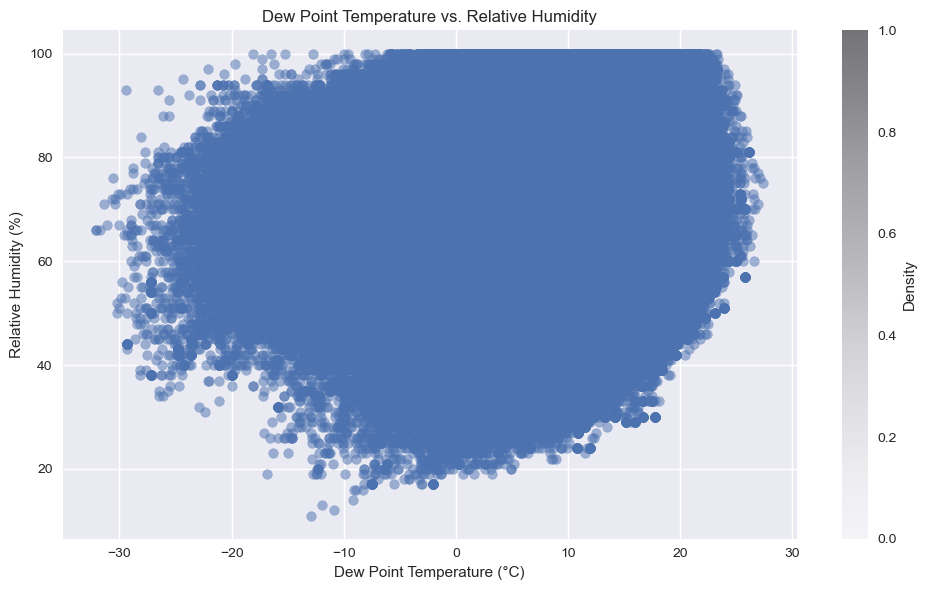

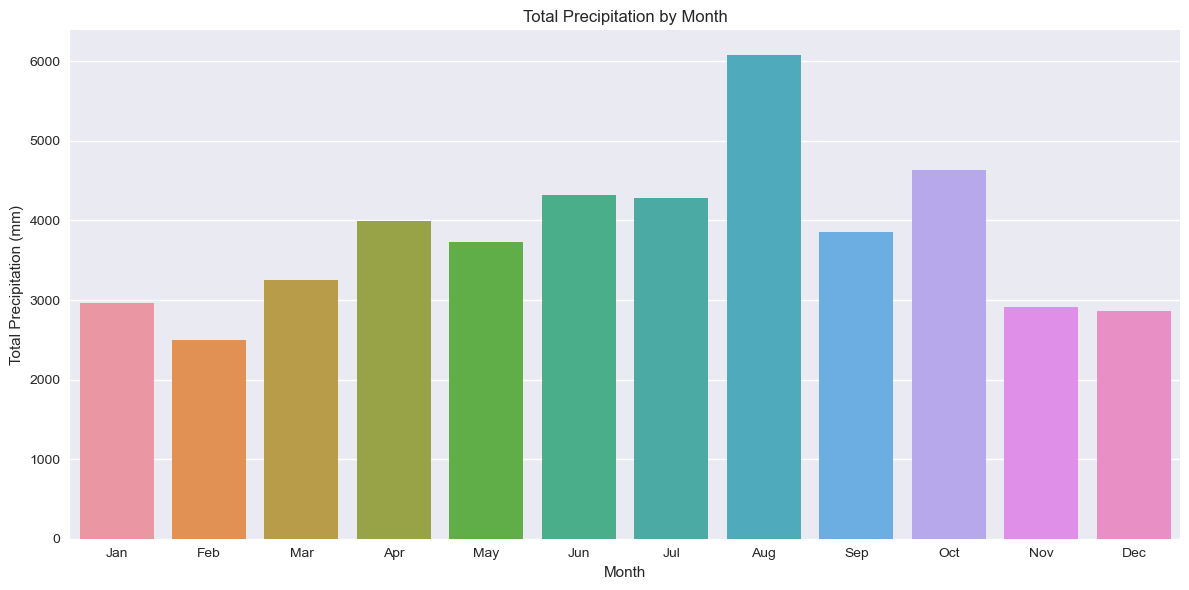

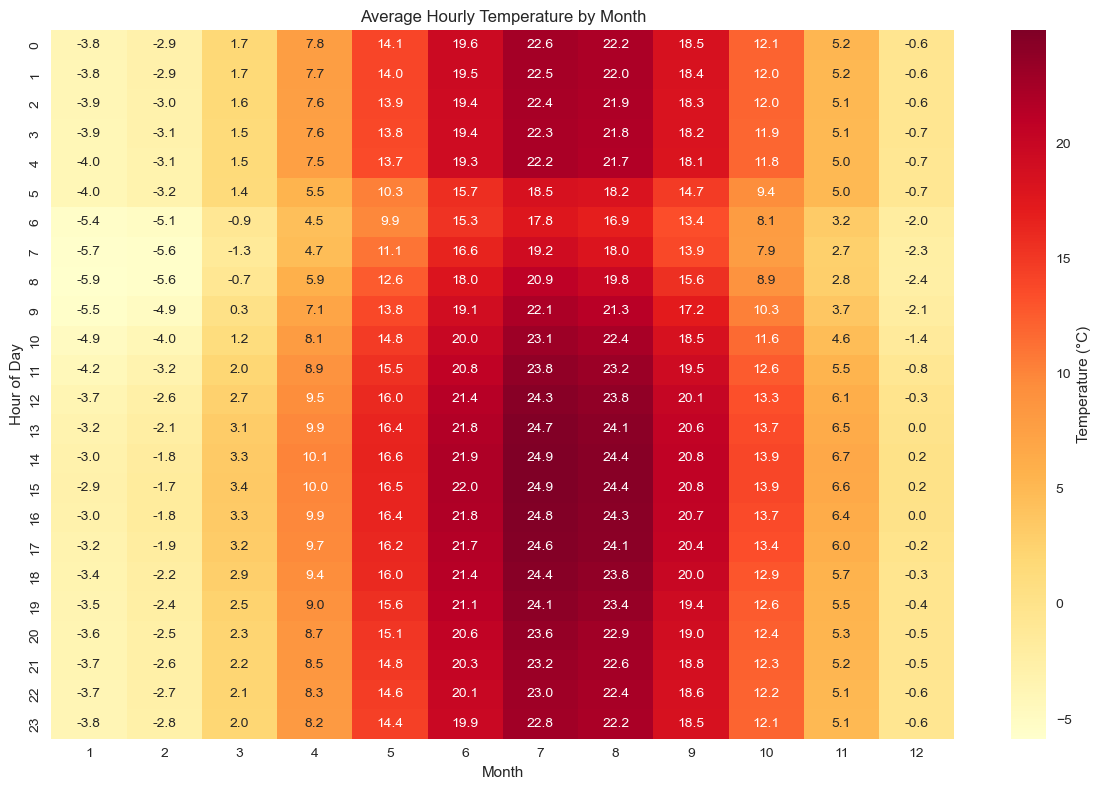

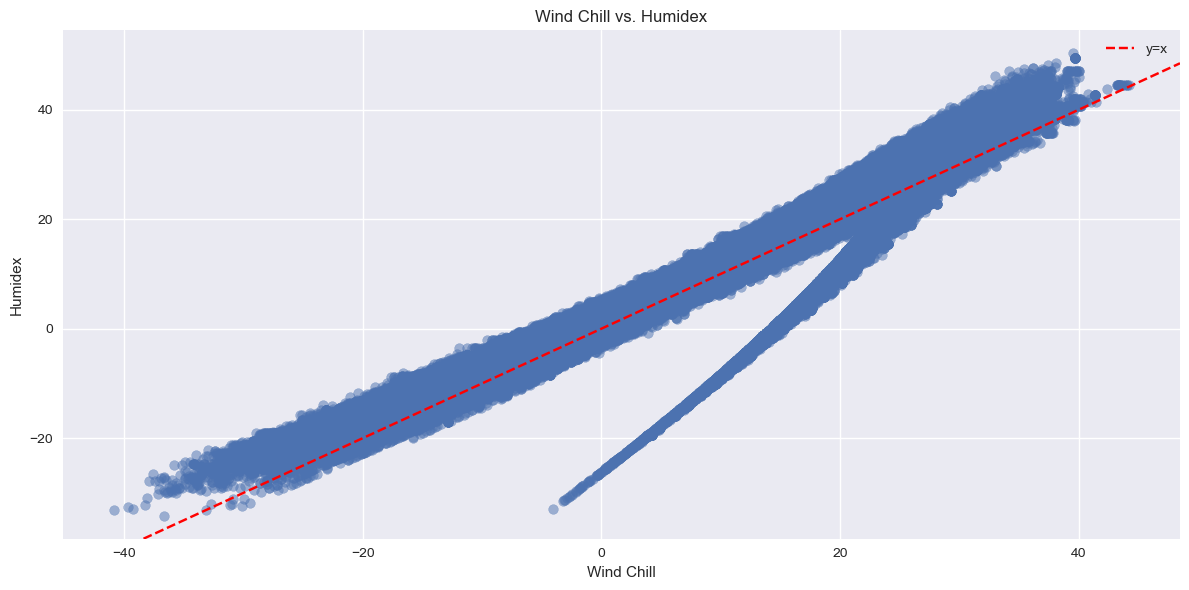

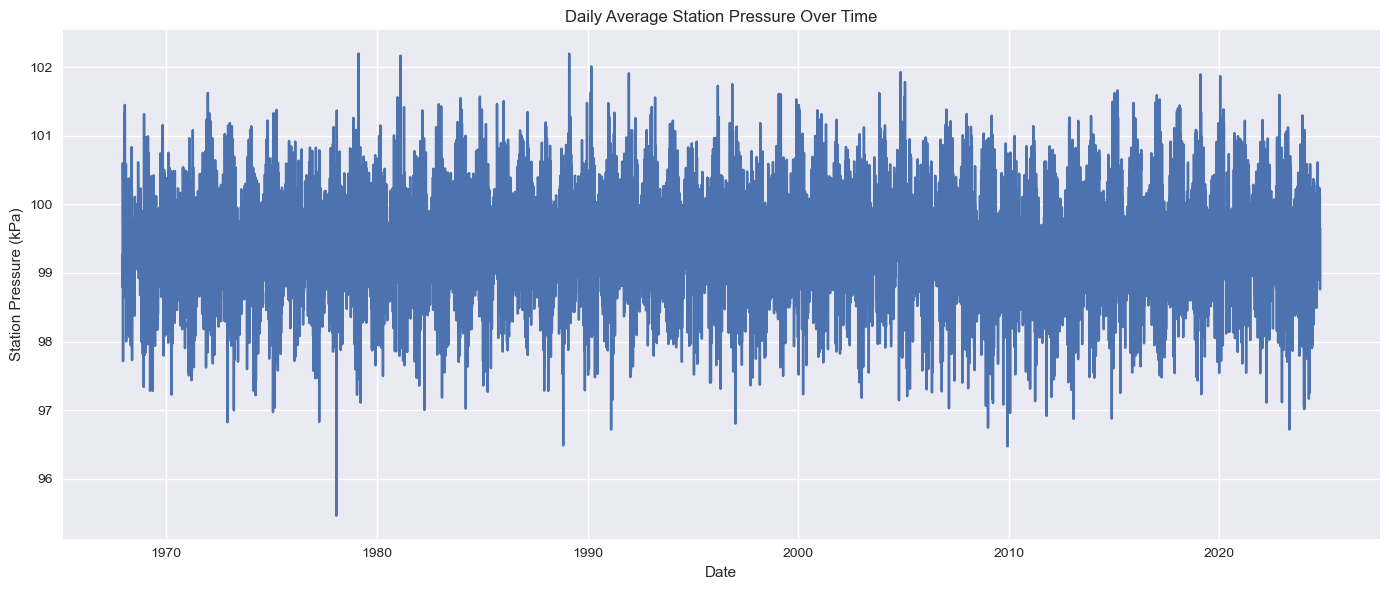

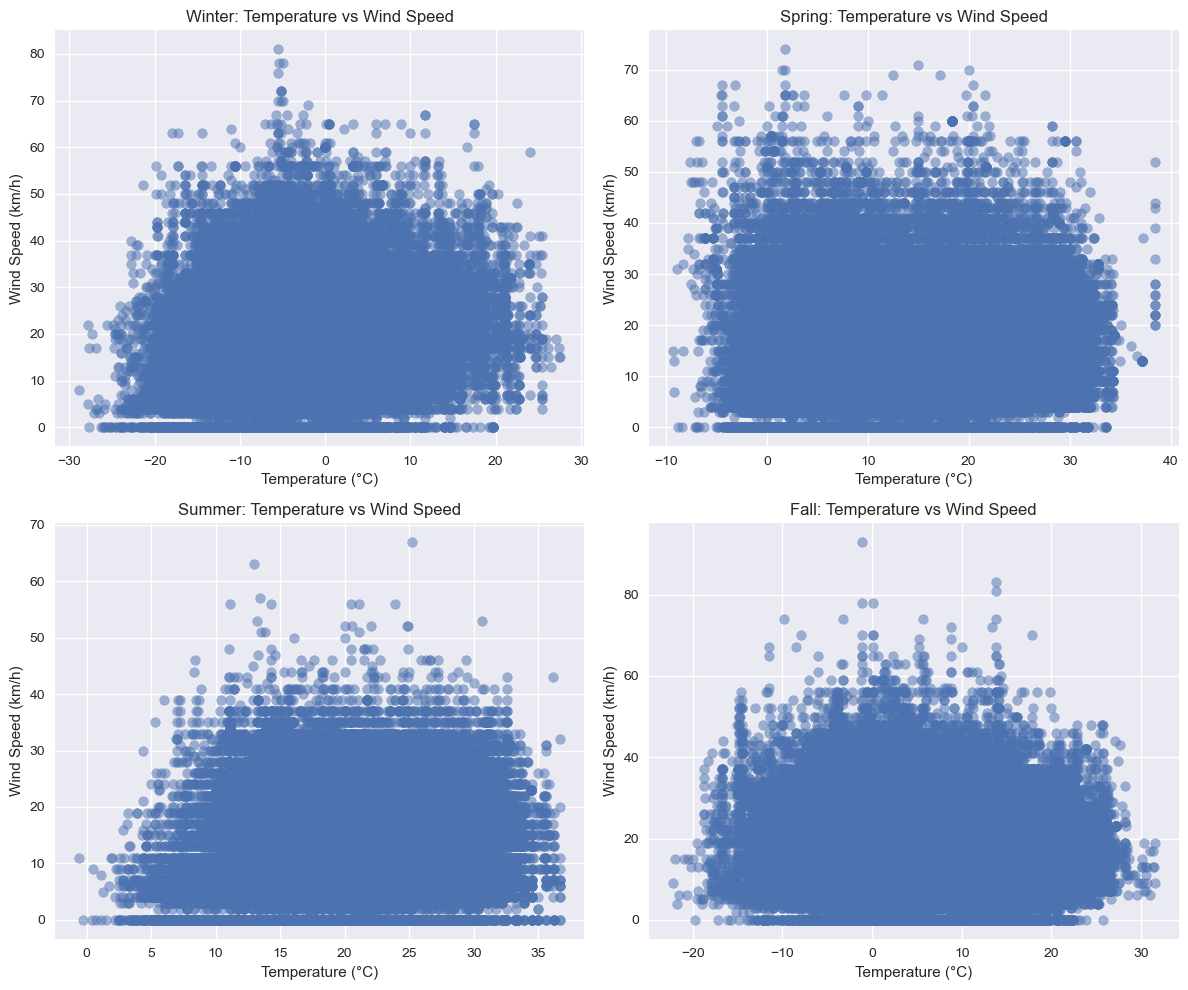

In [42]:
# 12. Dew Point vs. Relative Humidity Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Dew Point Temp (°C)'], df['Rel Hum (%)'], alpha=0.5)
plt.title('Dew Point Temperature vs. Relative Humidity')
plt.xlabel('Dew Point Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.colorbar(label='Density')
plt.tight_layout()
plt.show()


# 13. Monthly Precipitation Patterns
df['Month'] = df['Date/Time (LST)'].dt.month
monthly_precip = df.groupby('Month')['Precip. Amount (mm)'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Precip. Amount (mm)', data=monthly_precip)
plt.title('Total Precipitation by Month')
plt.xlabel('Month')
plt.ylabel('Total Precipitation (mm)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()


# 14. Heatmap of Hourly Temperature Patterns
hourly_temp = df.pivot_table(values='Temp (°C)', index=df['Date/Time (LST)'].dt.hour, columns=df['Date/Time (LST)'].dt.month, aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_temp, cmap='YlOrRd', annot=True, fmt='.1f', cbar_kws={'label': 'Temperature (°C)'})
plt.title('Average Hourly Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()


# 15. Wind Chill vs. Humidity Index (Humidex) Comparison
plt.figure(figsize=(12, 6))
plt.scatter(df['Wind Chill'], df['Hmdx'], alpha=0.5)
plt.title('Wind Chill vs. Humidex')
plt.xlabel('Wind Chill')
plt.ylabel('Humidex')
plt.axline([0, 0], [1, 1], color='r', linestyle='--', label='y=x')
plt.legend()
plt.tight_layout()
plt.show()

# 16. Pressure Trends Over Time
df['Date'] = df['Date/Time (LST)'].dt.date
daily_pressure = df.groupby('Date')['Stn Press (kPa)'].mean().reset_index()
plt.figure(figsize=(14, 6))
plt.plot(daily_pressure['Date'], daily_pressure['Stn Press (kPa)'])
plt.title('Daily Average Station Pressure Over Time')
plt.xlabel('Date')
plt.ylabel('Station Pressure (kPa)')
plt.tight_layout()
plt.show()

# 17. Correlation between Temperature and Wind Speed for Different Seasons
df['Season'] = pd.cut(df['Date/Time (LST)'].dt.month, bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'Fall'], include_lowest=True)
plt.figure(figsize=(12, 10))
for i, season in enumerate(['Winter', 'Spring', 'Summer', 'Fall'], 1):
    plt.subplot(2, 2, i)
    season_data = df[df['Season'] == season]
    plt.scatter(season_data['Temp (°C)'], season_data['Wind Spd (km/h)'], alpha=0.5)
    plt.title(f'{season}: Temperature vs Wind Speed')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Wind Speed (km/h)')
plt.tight_layout()
plt.show()


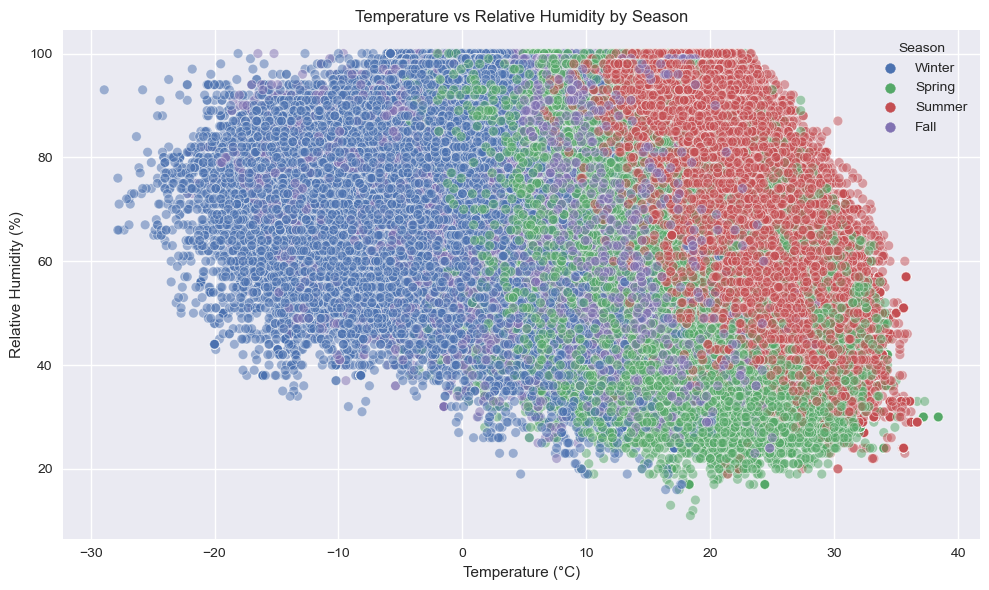

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


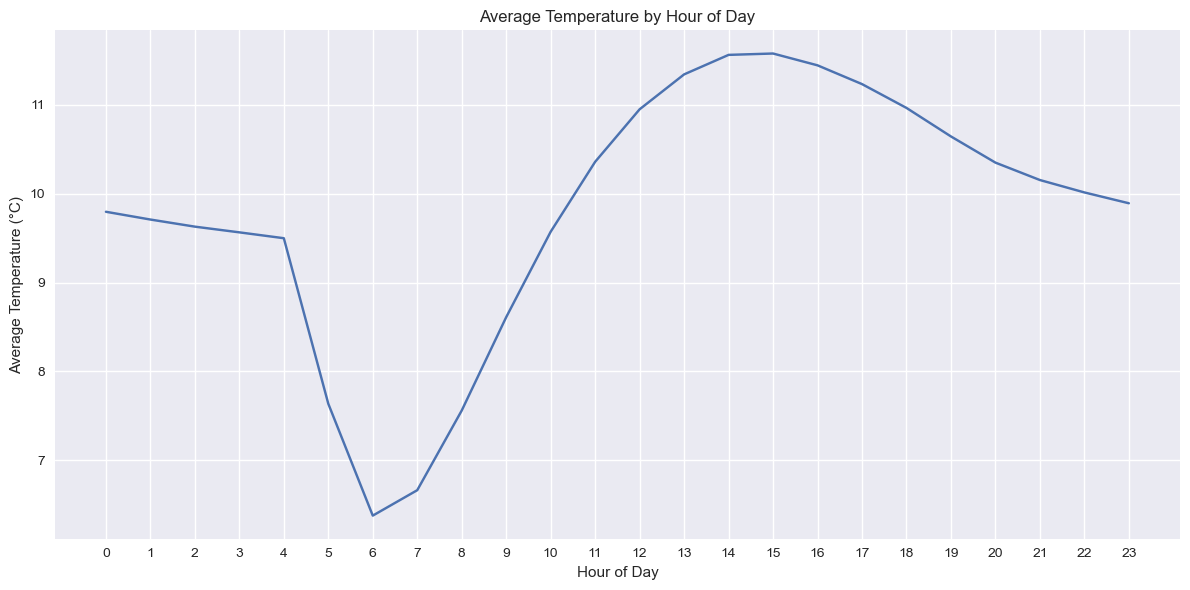

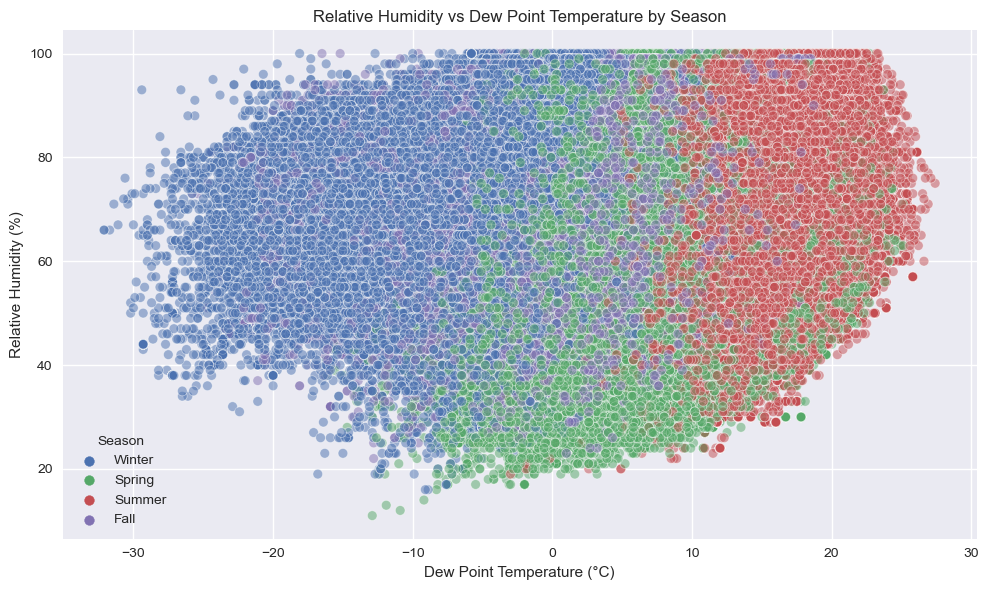

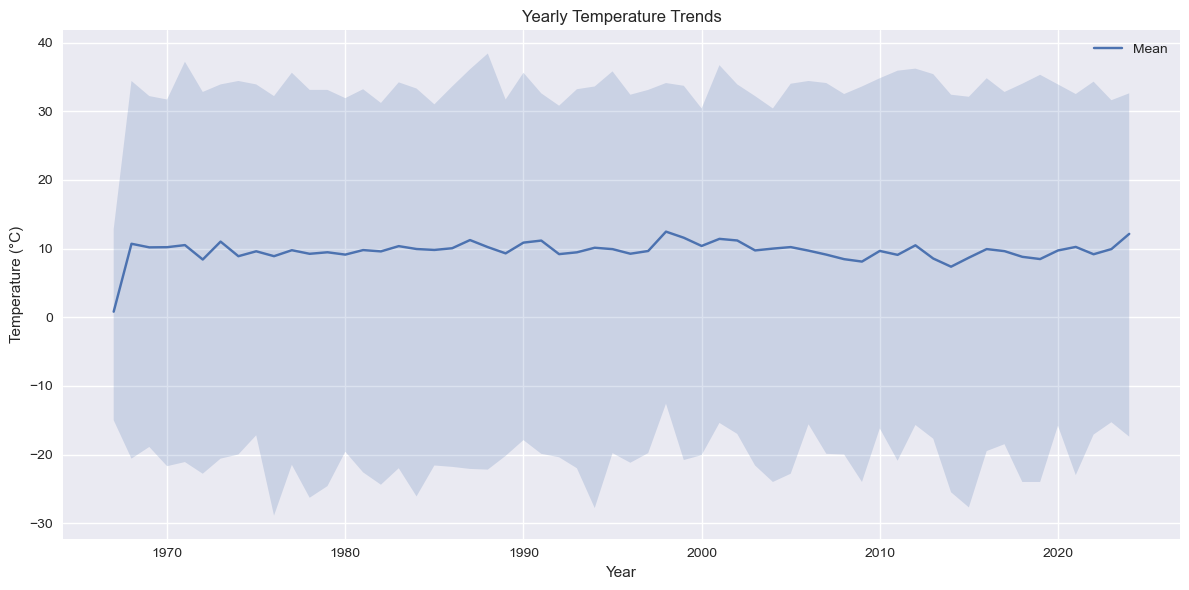

In [38]:

# 18. Temperature and Humidity Relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temp (°C)', y='Rel Hum (%)', hue='Season', alpha=0.5)
plt.title('Temperature vs Relative Humidity by Season')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.legend(title='Season')
plt.tight_layout()
plt.show()



# 19. Diurnal Temperature Variation
df['Hour'] = df['Date/Time (LST)'].dt.hour
hourly_temp = df.groupby('Hour')['Temp (°C)'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_temp.index, y=hourly_temp.values)
plt.title('Average Temperature by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Temperature (°C)')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


# 20. Humidity vs Dew Point Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Dew Point Temp (°C)', y='Rel Hum (%)', hue='Season', alpha=0.5)
plt.title('Relative Humidity vs Dew Point Temperature by Season')
plt.xlabel('Dew Point Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.legend(title='Season')
plt.tight_layout()
plt.show()


# 21. Yearly Temperature Trends
yearly_temp = df.groupby(df['Date/Time (LST)'].dt.year)['Temp (°C)'].agg(['mean', 'min', 'max'])
plt.figure(figsize=(12, 6))
plt.plot(yearly_temp.index, yearly_temp['mean'], label='Mean')
plt.fill_between(yearly_temp.index, yearly_temp['min'], yearly_temp['max'], alpha=0.2)
plt.title('Yearly Temperature Trends')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()